In [1]:
#tensorFlow para entrenar la red
import tensorflow as tf

# numpy :D
import numpy as np

# Imagenes
import skimage as ski
from skimage import data, io, filters
from skimage.transform import resize
from PIL import Image


# Graficado
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Lectura de archivos  
import os
import csv

#libreria números pseudo random
import random

#para plotear
import math
from scipy.fftpack import fft, ifft
from scipy import ndimage, misc
import scipy.misc

#importar sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

import cv2 as cv
import sys
import matplotlib.pyplot as plt
%matplotlib inline
print("OpenCV version:")
print(cv.__version__)

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

OpenCV version:
3.4.2


In [2]:
def VideoProcessing(numberFrames,frameRange,Folder,VideoNumberI,VideoNumberF,sizey,sizex):
    videos = []
    for x in range(VideoNumberI,VideoNumberF):
        fps,frameCount,duration = frames(Folder + str(x+1) +'.mov')
        cap = cv.VideoCapture(Folder + str(x+1) +'.mov')
        fullVideo = saveVideo(frameCount,cap,sizey,sizex)
        print(len(fullVideo))
        frameRangeCounter = 0
        contadorGlobal = 0
        contador = 0
        initFrame = 0
        video = []
        #print('llegue a la separacion de los filtros')
        while(contadorGlobal < int(frameCount/(frameRange*framesSpace))):
            #initFrame = random.randint(1, frameRange)
            contador = 0
            videoTemporal = []
            for frame in fullVideo:
                if(contador >= initFrame and contador < initFrame + numberFrames):
                    videoTemporal.append(frame[0])
                    videoTemporal.append(frame[1])
                    videoTemporal.append(frame[2])
                    videoTemporal.append(frame[3])
                    videoTemporal.append(frame[4])
                    #videoTemporal.append(frame[5])
                    #videoTemporal.append(frame[6])
                    #videoTemporal.append(frame[7])
                    #videoTemporal.append(frame[8])
                    #videoTemporal.append(frame[9])
                    contador = contador + 1
                        
                else:
                    contador = contador + 1
            
            if(len(videoTemporal) == frameRange*filtros):
                video.append(videoTemporal)
            initFrame = initFrame + frameRange
            print("videoTemporal de frames ",initFrame, 'tamano  ', len(videoTemporal))
            #print("videoTemporal de frames ",initFrame, 'tamano  ', len(videoTemporal))
            contadorGlobal = contadorGlobal + 1  
        if(len(video) != 0 ):
            video = np.array(video)
            videos.append(video)
        print('video   ', x)
    videos = np.array(videos)        
    return videos

In [3]:
a = [[None,1],None,1,2]
b = None

In [4]:
print(a)

[[None, 1], None, 1, 2]


In [5]:
if(a):
    print('pene')

pene


In [6]:
def saveVideo(frameCount,cap,y,x):
    contador = 0
    fullVideo = []
    bandera = 0
    temporalFace = None
    #guardamos todo el video en un vector de frames
    while(contador < frameCount):
        Video = [] 
        ret, frame2 = cap.read()
        if (frame2 is not None):
            #print(contador)
            #if(contador >= 1100):
            #    print(frame2)
            #    print(noSirve1)
            #    print(noSirve2)
            #if(contador > 742 and contador < 746):
            #    plt.imshow(frame2, int erpolation='none', cmap='gray')
            #    plt.xticks([]), plt.yticks([])
            #    plt.show()
            #b,g,r = cv.split(frame2)
            gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
            face = face_cascade.detectMultiScale(gray, 1.05, 5)
            if(len(face) == 1):
                bandera = 1
                temporalFace = face
            else:
                bandera = 0
            if(bandera == 1 or temporalFace is not None):
                if(x != 0 and y != 0):
                    #print(face[0][0],face[0][1],face[0][2],face[0][3])
                    if(bandera == 1):
                        gray = redimensionar(gray,y,x,face)
                    else:
                        #print(temporalFace)
                        gray = redimensionar(gray,y,x,temporalFace)
                    pic1 = gray
                    #r = redimensionar(r,y,x)
                    #g = redimensionar(g,y,x)
                    #b = redimensionar(b,y,x)
                laplacian = cv.Laplacian(gray,cv.CV_8U)
                sobelx = cv.Sobel(gray,cv.CV_16S,1,0,ksize=5)
                sobely = cv.Sobel(gray,cv.CV_16S,0,1,ksize=5)
                kirs = kirsch_filter(gray)
                #Video.append(r)
                #Video.append(g)
                #Video.append(b)
                Video.append(gray)
                Video.append(sobelx)
                Video.append(sobely)
                Video.append(laplacian)
                Video.append(kirs)
                if(contador > 0):
                    #OPTx, OPTy = calculate_flow(pic1, gray)
                    #Video.append(OPTx)
                    #Video.append(OPTy)
                    fullVideo.append(Video)
                    ret2, noSirve2 = cap.read()
                    ret3, noSirve3 = cap.read()
                    #ret4, noSirve4 = cap.read()
                    contador = contador + framesSpace - 1
        contador = contador + 1
    cap.release()
    fullVideo  = np.array(fullVideo)
    return fullVideo 

In [7]:
def redimensionar(frame,y,x,face):
    frame=ski.util.img_as_ubyte(frame) #ni golfita idea, ya se!! convierte las imagenes a cosas menos pesadas
    #len(frame[0])
    #len(frame)
    #crop_img = frame[20:len(frame)-50, 110:len(frame[0])-50]
    #print(len(face))
    crop_img = frame[face[0][1]:face[0][1]+int(face[0][3]), face[0][0]:face[0][0]+face[0][2]]
    im = cv.resize(crop_img,(y,x), fx=0.5, fy=0.5, interpolation = cv.INTER_AREA)
    return im

In [8]:
def calculate_flow(frame_a, frame_b):
        flow = cv.calcOpticalFlowFarneback(
            frame_a,
            frame_b,
            None,
            0.5, 3, 15, 3, 5, 1.2, 0
        )

        # Change here
        horz = cv.normalize(flow[..., 0], None, 0, 255, cv.NORM_MINMAX)
        vert = cv.normalize(flow[..., 1], None, 0, 255, cv.NORM_MINMAX)
        horz = horz.astype('uint8')
        vert = vert.astype('uint8')

        return horz, vert

In [9]:
import numpy as np
import cv2

def kirsch_filter(gray):
    if gray.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG1 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.int16)
    kernelG2 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.int16)
    kernelG3 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.int16)
    kernelG4 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.int16)
    kernelG5 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.int16)
    kernelG6 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.int16)
    kernelG7 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.int16)
    kernelG8 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.int16)

    g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    magn = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return magn

In [10]:
def frames(video):
    cap = cv.VideoCapture(video)
    fps = cap.get(cv.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
    frameCount = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    duration = frameCount/fps

    print('fps = ' + str(fps))
    print('number of frames = ' + str(frameCount))
    print('duration (S) = ' + str(duration))
    minutes = int(duration/60)
    seconds = duration%60
    print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))
    cap.release()
    return fps,frameCount,duration

In [11]:
numberFrames = 100  #18
frameRange = 100  #56
framesSpace = 3
#TruthFolder = "videos2/Testing/T/"
#DeceitFolder = "videos2/Testing/F/"
TruthFolder = "videos2/TValidation/"
DeceitFolder = "videos2/LValidation/"
TruthVideoNumber = 13
DeceitVideoNumber = 13
filtros = 5

# Correr hasta aqui si solamente se va a hacer shuffle, pasar al siguiente comentario 
## PD: no olvides cambiar en numero de frames que se van a procesar

In [49]:
VideoNumberI = 0
VideoNumberF = TruthVideoNumber
videosTruth = VideoProcessing(numberFrames,frameRange,TruthFolder,VideoNumberI,VideoNumberF,50,50)
videosTruth = np.array(videosTruth)

fps = 29.969500066304203
number of frames = 1130
duration (S) = 37.705
duration (M:S) = 0:37.705
374
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
videoTemporal de frames  300 tamano   500
video    0
fps = 29.969452624047115
number of frames = 1089
duration (S) = 36.336999999999996
duration (M:S) = 0:36.336999999999996
361
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
videoTemporal de frames  300 tamano   500
video    1
fps = 29.96948872223331
number of frames = 1051
duration (S) = 35.069
duration (M:S) = 0:35.069
348
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
videoTemporal de frames  300 tamano   500
video    2
fps = 29.969926371461163
number of frames = 1156
duration (S) = 38.572
duration (M:S) = 0:38.572
383
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
videoTemporal de frames  300 tamano   500
video    3
fps = 29.97002997002997
n

In [50]:
len(videosTruth[0])
suma = 0
for x in range(len(videosTruth)):
    #print(len(videosTruth[x]))
    suma = suma + len(videosTruth[x])
print(len(videosTruth))
print(suma)
    

13
39


0


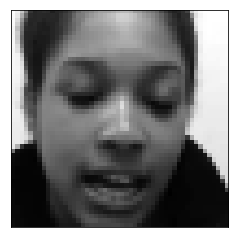

0


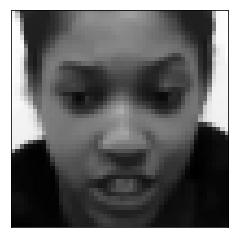

0


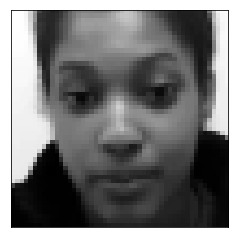

1


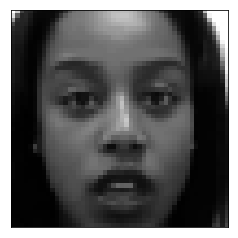

1


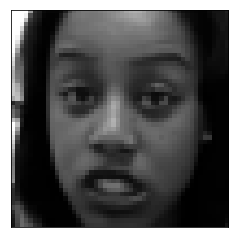

1


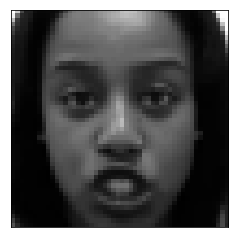

2


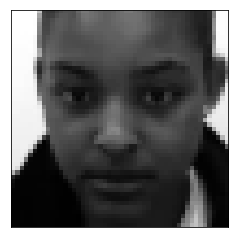

2


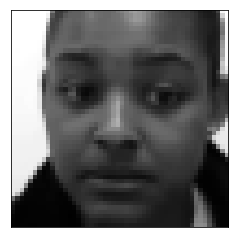

2


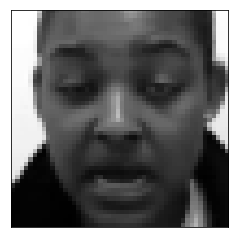

3


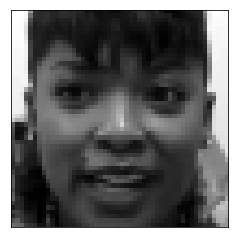

3


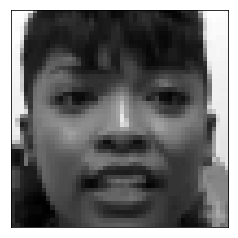

3


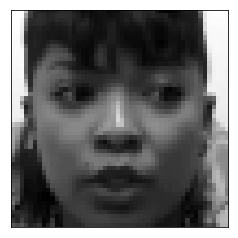

4


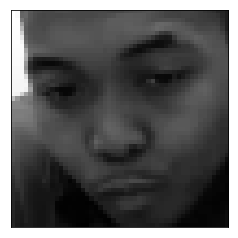

4


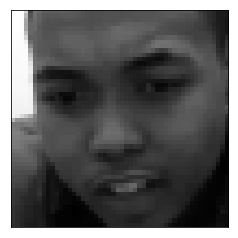

4


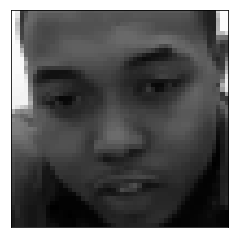

5


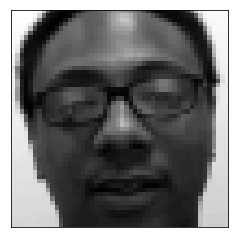

5


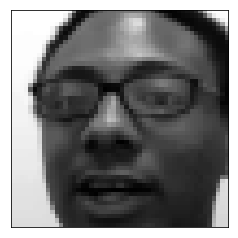

5


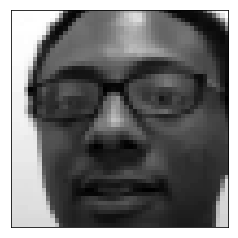

6


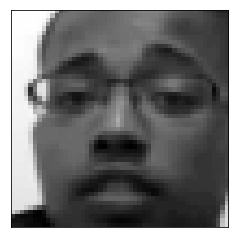

6


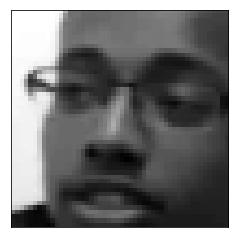

6


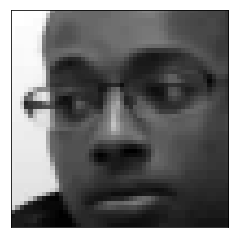

7


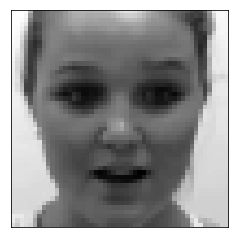

7


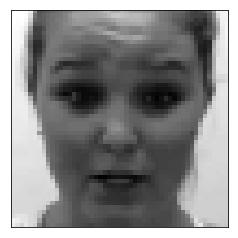

7


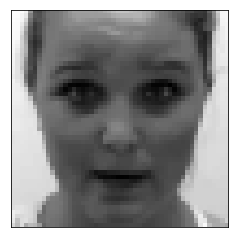

8


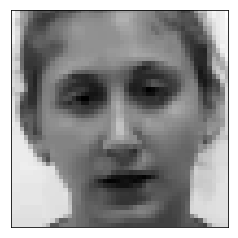

8


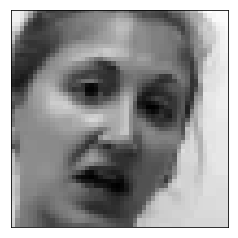

8


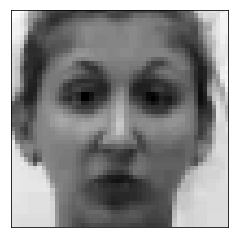

9


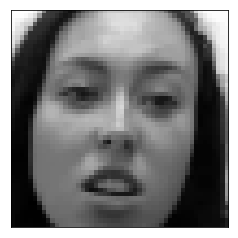

9


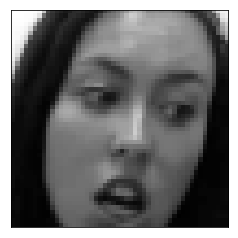

9


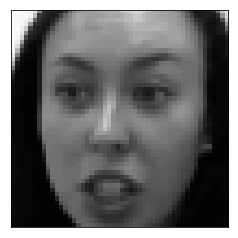

10


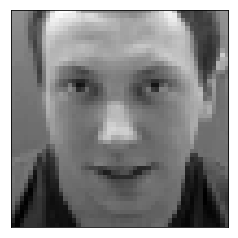

10


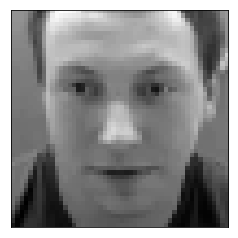

10


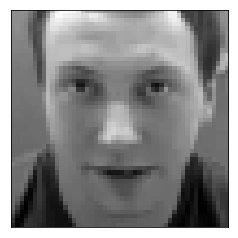

11


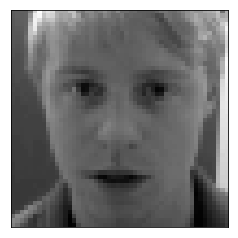

11


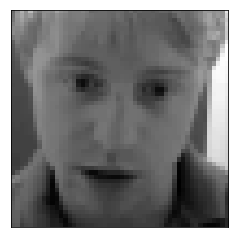

11


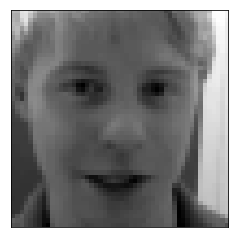

12


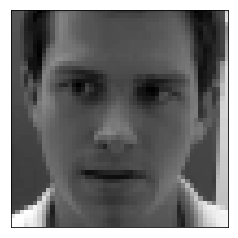

12


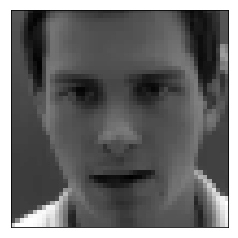

12


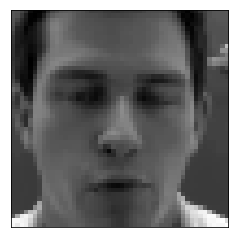

13

In [51]:
for x in range(len(videosTruth)):
    for y in range(len(videosTruth[x])):
        print(x)
        plt.imshow(videosTruth[x][y][0], interpolation='none', cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.show()
len(videosTruth)

In [52]:
#TruthRF = []
#TruthGF = []
#TruthBF = []
TruthGSF = []
TruthSXF = []
TruthSYF = []
TruthLAPF = []
TruthKIRF = []
#TruthOXF = []
#TruthOYF = []
yTruthF = []
for y in videosTruth:
    print(len(y[0]))
    #TruthR = []
    #TruthG = []
    #TruthB = []
    TruthGS = []
    TruthSX = []
    TruthSY = []
    TruthLAP = []
    TruthKIR = []
    #TruthOX = []
    #TruthOY = []
    yTruth = []
    contadorr = 0
    if(len(y)!=0):
        for x in y:
            #temporalR = []
            #temporalG = []
            #temporalB = []
            temporalGS = []
            temporalSX = []
            temporalSY = []
            temporalLAP = []
            temporalKIR = []
            temporalOX = []
            temporalOY = []
            if(len(x)==numberFrames*filtros):
                contador = 0
                for y in range(numberFrames):
                    temporalGS.append(x[contador])
                    contador = contador + filtros

                contador = 1
                for y in range(numberFrames):
                    temporalSX.append(x[contador])
                    contador = contador + filtros

                contador = 2
                for y in range(numberFrames):
                    temporalSY.append(x[contador])
                    contador = contador + filtros

                contador = 3
                for y in range(numberFrames):
                    temporalLAP.append(x[contador])
                    contador = contador + filtros

                contador = 4
                for y in range(numberFrames):
                    temporalKIR.append(x[contador])
                    contador = contador + filtros

                #contador = 5
                #for y in range(numberFrames):
                #    temporalOX.append(x[contador])
                #    contador = contador + filtros

                #contador = 6
                #for y in range(numberFrames):
                #    temporalOY.append(x[contador])
                #    contador = contador + filtros

                temporalGS = np.array(temporalGS)
                temporalSX = np.array(temporalSX)
                temporalSY = np.array(temporalSY)
                temporalLAP = np.array(temporalLAP)
                temporalKIR = np.array(temporalKIR)
                
                #TruthR.append(temporalR)
                #TruthG.append(temporalG)
                #TruthB.append(temporalB)
                TruthGS.append(temporalGS)
                TruthSX.append(temporalSX)
                TruthSY.append(temporalSY)
                TruthLAP.append(temporalLAP)
                TruthKIR.append(temporalKIR)
                #TruthOX.append(temporalOX)
                #TruthOY.append(temporalOY)
                yTruth.append([0,1])
                contadorr += 1
            else:
                print("contador ",contadorr, "len ",len(x))
                contadorr += 1
                
                
        TruthGS = np.array(TruthGS)
        TruthSX = np.array(TruthSX)
        TruthSY = np.array(TruthSY)
        TruthLAP = np.array(TruthLAP)
        TruthKIR = np.array(TruthKIR)
                
        #TruthRF.append(TruthR)
        #TruthGF.append(TruthG)
        #TruthBF.append(TruthB)
        TruthGSF.append(TruthGS)
        TruthSXF.append(TruthSX)
        TruthSYF.append(TruthSY)
        TruthLAPF.append(TruthLAP)
        TruthKIRF.append(TruthKIR)
        #TruthOXF.append(TruthOX)
        #TruthOYF.append(TruthOY)
        yTruthF.append(yTruth)
        
        
TruthGSF = np.array(TruthGSF)
TruthSXF = np.array(TruthSXF)
TruthSYF = np.array(TruthSYF)
TruthLAPF = np.array(TruthLAPF)
TruthKIRF = np.array(TruthKIRF)
yTruthF = np.array(yTruthF)
        
        

500
500
500
500
500
500
500
500
500
500
500
500
500


In [53]:
print("TruthGS ",len(TruthGSF),"  TruthSX  ",len(TruthSXF),"TruthSY  ",len(TruthSYF),
      "TruthLAP ",len(TruthLAPF),"  TruthKIR  ",len(TruthKIRF),"  yTruth  ",len(yTruthF))
suma = 0
for x in range(len(TruthGSF)):
    #print(len(videosTruth[x]))
    suma = suma + len(TruthGSF[x])
print(suma)
#print(TruthGSF)

TruthGS  13   TruthSX   13 TruthSY   13 TruthLAP  13   TruthKIR   13   yTruth   13
39


In [13]:
VideoNumberI = 0
VideoNumberF = 13
videosDeceit = VideoProcessing(numberFrames,frameRange,DeceitFolder,VideoNumberI,VideoNumberF,50,50)
videosDeceit = np.array(videosDeceit)

fps = 29.969301611665387
number of frames = 781
duration (S) = 26.060000000000002
duration (M:S) = 0:26.060000000000002
258
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
video    0
fps = 29.969193678006963
number of frames = 895
duration (S) = 29.864
duration (M:S) = 0:29.864
296
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
video    1
fps = 29.96914940502424
number of frames = 748
duration (S) = 24.959
duration (M:S) = 0:24.959
247
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
video    2
fps = 29.969340827797648
number of frames = 1173
duration (S) = 39.14
duration (M:S) = 0:39.14
389
videoTemporal de frames  100 tamano   500
videoTemporal de frames  200 tamano   500
videoTemporal de frames  300 tamano   500
video    3
fps = 29.97002997002997
number of frames = 1101
duration (S) = 36.7367
duration (M:S) = 0:36.7367
367
videoTemporal de frames  100 tamano   500
videoTempora

In [14]:
len(videosDeceit[0])

2

0


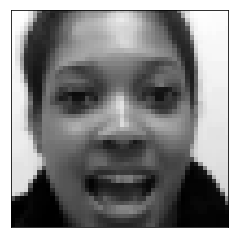

0


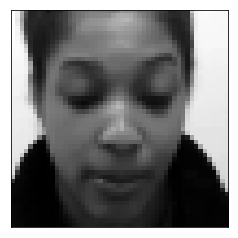

1


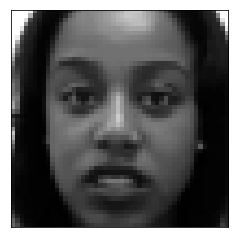

1


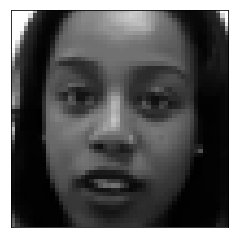

2


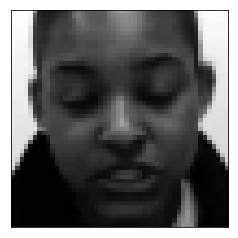

2


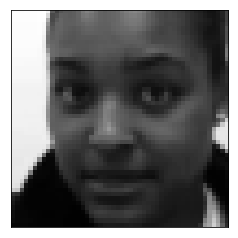

3


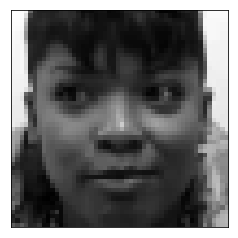

3


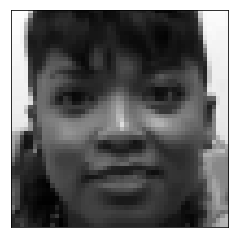

3


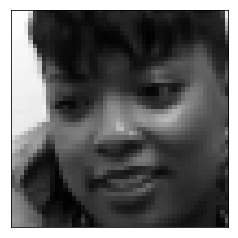

4


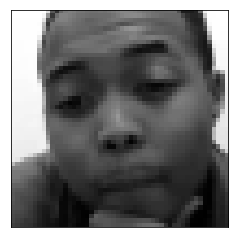

4


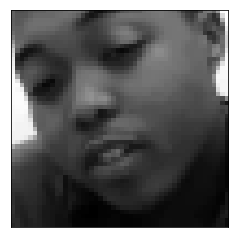

4


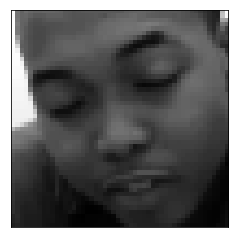

5


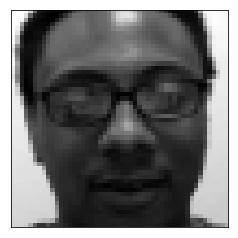

5


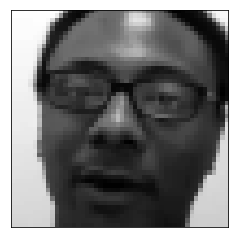

5


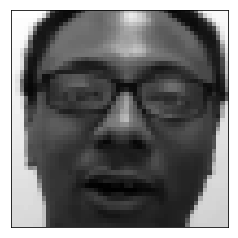

6


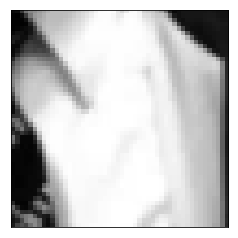

6


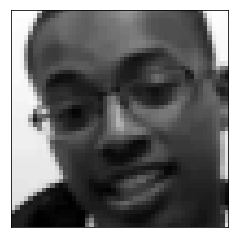

6


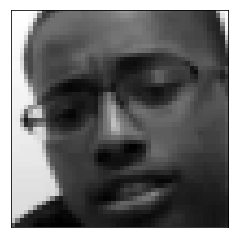

6


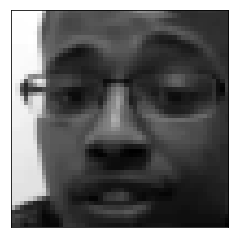

7


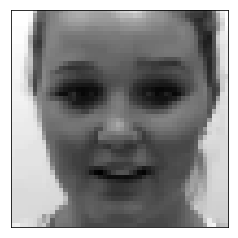

7


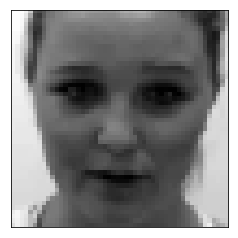

7


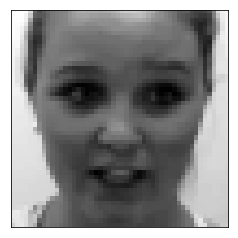

8


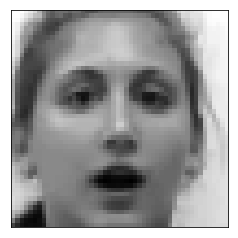

8


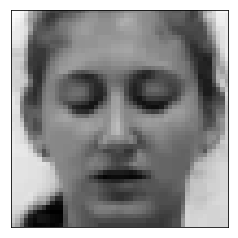

8


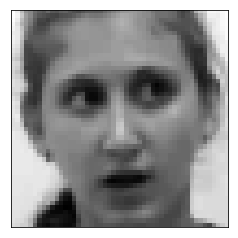

9


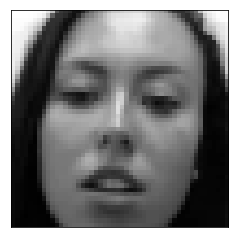

9


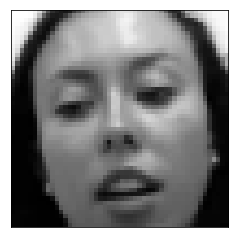

9


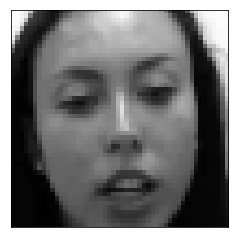

9


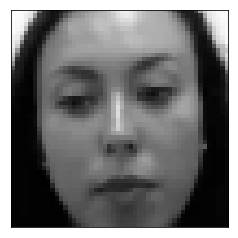

10


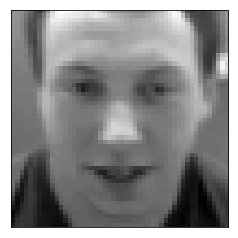

10


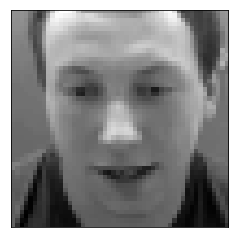

10


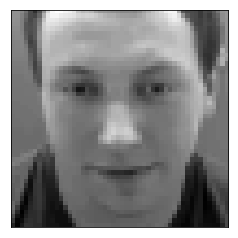

11


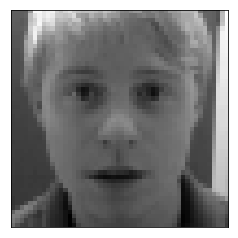

11


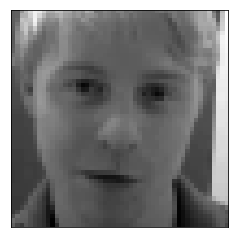

11


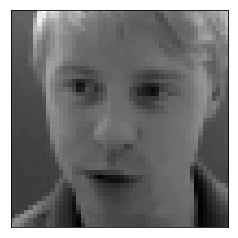

11


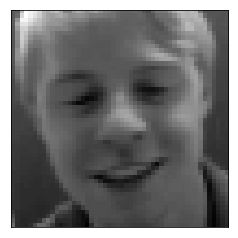

12


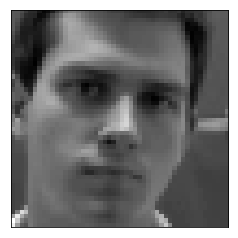

12


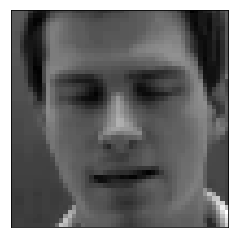

12


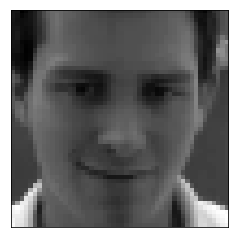

12


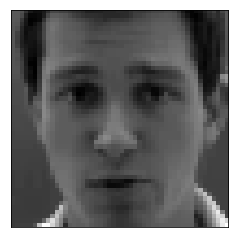

13

In [15]:
for x in range(len(videosDeceit)):
    for y in range(len(videosDeceit[x])):
        print(x)
        plt.imshow(videosDeceit[x][y][0], interpolation='none', cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.show()
len(videosDeceit)

In [16]:
len(videosDeceit[0])
suma = 0
for x in range(len(videosDeceit)):
    #print(len(videosTruth[x]))
    suma = suma + len(videosDeceit[x])
print(len(videosDeceit))
print(suma)

13
40


In [17]:
#DeceitRF = []
#DeceitGF = []
#DeceitBF = []
DeceitGSF = []
DeceitSXF = []
DeceitSYF = []
DeceitLAPF = []
DeceitKIRF = []
#TDeceitOXF = []
#DeceitOYF = []
yDeceitF = []
for y in videosDeceit:
    print(len(y[0]))
    #DeceitR = []
    #TDeceitG = []
    #DeceitB = []
    DeceitGS = []
    DeceitSX = []
    DeceitSY = []
    DeceitLAP = []
    DeceitKIR = []
    #DeceitOX = []
    #DeceitOY = []
    yDeceit = []
    contadorr = 0
    if(len(y)!=0):
        for x in y:
            #temporalR = []
            #temporalG = []
            #temporalB = []
            temporalGS = []
            temporalSX = []
            temporalSY = []
            temporalLAP = []
            temporalKIR = []
            temporalOX = []
            temporalOY = []
            if(len(x)==numberFrames*filtros):
                contador = 0
                for y in range(numberFrames):
                    temporalGS.append(x[contador])
                    contador = contador + filtros

                contador = 1
                for y in range(numberFrames):
                    temporalSX.append(x[contador])
                    contador = contador + filtros

                contador = 2
                for y in range(numberFrames):
                    temporalSY.append(x[contador])
                    contador = contador + filtros

                contador = 3
                for y in range(numberFrames):
                    temporalLAP.append(x[contador])
                    contador = contador + filtros

                contador = 4
                for y in range(numberFrames):
                    temporalKIR.append(x[contador])
                    contador = contador + filtros

                #contador = 5
                #for y in range(numberFrames):
                #    temporalOX.append(x[contador])
                #    contador = contador + filtros

                #contador = 6
                #for y in range(numberFrames):
                #    temporalOY.append(x[contador])
                #    contador = contador + filtros

                temporalGS = np.array(temporalGS)
                temporalSX = np.array(temporalSX)
                temporalSY = np.array(temporalSY)
                temporalLAP = np.array(temporalLAP)
                temporalKIR = np.array(temporalKIR)
                
                #DeceitR.append(temporalR)
                #DeceitG.append(temporalG)
                #DeceitB.append(temporalB)
                DeceitGS.append(temporalGS)
                DeceitSX.append(temporalSX)
                DeceitSY.append(temporalSY)
                DeceitLAP.append(temporalLAP)
                DeceitKIR.append(temporalKIR)
                #DeceitOX.append(temporalOX)
                #DeceitOY.append(temporalOY)
                yDeceit.append([1,0])
                contadorr += 1
            else:
                print("contador ",contadorr, "len ",len(x))
                contadorr += 1
                
                
        DeceitGS = np.array(DeceitGS)
        DeceitSX = np.array(DeceitSX)
        DeceitSY = np.array(DeceitSY)
        DeceitLAP = np.array(DeceitLAP)
        DeceitKIR = np.array(DeceitKIR)
                
        #DeceitRF.append(DeceitR)
        #DeceitGF.append(DeceitG)
        #DeceitBF.append(DeceitB)
        DeceitGSF.append(DeceitGS)
        DeceitSXF.append(DeceitSX)
        DeceitSYF.append(DeceitSY)
        DeceitLAPF.append(DeceitLAP)
        DeceitKIRF.append(DeceitKIR)
        #DeceitOXF.append(DeceitOX)
        #DeceitOYF.append(DeceitOY)
        yDeceitF.append(yDeceit)
        
        
DeceitGSF = np.array(DeceitGSF)
DeceitSXF = np.array(DeceitSXF)
DeceitSYF = np.array(DeceitSYF)
DeceitLAPF = np.array(DeceitLAPF)
DeceitKIRF = np.array(DeceitKIRF)
yDeceitF = np.array(yDeceitF)
        

500
500
500
500
500
500
500
500
500
500
500
500
500


In [30]:
print("TruthGS ",len(TruthGSF),"  TruthSX  ",len(TruthSXF),"TruthSY  ",len(TruthSYF),
      "TruthLAP ",len(TruthLAPF),"  TruthKIR  ",len(TruthKIRF),"  yTruth  ",len(yTruthF))
suma = 0
for x in range(len(TruthGSF)):
    #print(len(videosTruth[x]))
    suma = suma + len(TruthGSF[x])
print(suma)

TruthGS  13   TruthSX   13 TruthSY   13 TruthLAP  13   TruthKIR   13   yTruth   13
39


In [31]:
print("DeceitGS ",len(DeceitGSF),"  DeceitSX  ",len(DeceitSXF),"DeceitSY  ",len(DeceitSYF),
      "DeceitLAP ",len(DeceitLAPF),"  DeceitKIR  ",len(DeceitKIRF),"  yDeceit  ",len(yDeceitF))
suma = 0
for x in range(len(DeceitGSF)):
    #print(len(videosTruth[x]))
    suma = suma + len(DeceitGSF[x])
print(suma)

DeceitGS  13   DeceitSX   13 DeceitSY   13 DeceitLAP  13   DeceitKIR   13   yDeceit   13
40


In [32]:
len(DeceitGSF[0][0][0][0])

50

In [33]:
len(videosDeceit[0])

2

In [34]:
TruthGSF.shape

(13, 3, 100, 50, 50)

In [35]:
DeceitGSF.shape

(13,)

In [72]:
TruthGSF = np.array(TruthGSF)
DeceitGSF = np.array(DeceitGSF)
TruthSXF = np.array(TruthSXF)
DeceitSXF = np.array(DeceitSXF)
TruthSYF = np.array(TruthSYF)
DeceitSYF = np.array(DeceitSYF)
TruthLAPF = np.array(TruthLAPF)
DeceitLAPF = np.array(DeceitLAPF)
TruthKIRF = np.array(TruthKIRF)
DeceitKIRF = np.array(DeceitKIRF)
#TruthOXF = np.array(TruthOXF)
#DeceitOXF = np.array(DeceitOXF)
#TruthOYF = np.array(TruthOYF)
#DeceitOYF = np.array(DeceitOYF)
yTruthF = np.array(yTruthF)
yDeceitF = np.array(yDeceitF)

In [ ]:
#DataRTrain = np.concatenate((TruthR , DeceitR),axis=0)
#DataGTrain =  np.concatenate((TruthG , DeceitG),axis=0)
#DataBTrain = np.concatenate((TruthB , DeceitB),axis=0)

In [28]:
DataGSTrain = np.concatenate((TruthGSF , DeceitGSF),axis=0)
DataSXTrain =  np.concatenate((TruthSXF , DeceitSXF),axis=0)
DataSYTrain = np.concatenate((TruthSYF , DeceitSYF),axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
DataLAPTrain = np.concatenate((TruthLAPF , DeceitLAPF),axis=0)
DataKIRTrain = np.concatenate((TruthKIRF , DeceitKIRF),axis=0)

In [ ]:
#DataOXTrain = np.concatenate((TruthOXF , DeceitOXF),axis=0)
#DataOYTrain = np.concatenate((TruthOYF , DeceitOYF),axis=0)

In [ ]:
DatayTrain = np.concatenate((yTruthF , yDeceitF),axis=0)

In [ ]:
print("DataGSTrain ",len(DataGSTrain),"  DatayTrain  ",len(DatayTrain))

In [ ]:
len(DataGSTrain)

In [ ]:
len(DataGSTrain[3])

In [ ]:
len(DataGSTrain[1][0])

In [ ]:
len(DataGSTrain[1][0][0])

In [ ]:
len(DataGSTrain[1][0][0][0])

In [ ]:
for x in range(0,len(DataGSTrain)):
    print(x)
    print(DatayTrain[x][0])
    plt.imshow(DataGSTrain[x][0][0], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationGS'+str(numberFrames)+'.npy',np.array(DataGSTrain))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationSX'+str(numberFrames)+'.npy',np.array(DataSXTrain))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationSY'+str(numberFrames)+'.npy',np.array(DataSYTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationLAP'+str(numberFrames)+'.npy',np.array(DataLAPTrain))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationKIR'+str(numberFrames)+'.npy',np.array(DataKIRTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationY'+str(numberFrames)+'.npy',np.array(DatayTrain))

In [36]:
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationTruthGS'+str(numberFrames)+'.npy',np.array(TruthGSF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationTruthSX'+str(numberFrames)+'.npy',np.array(TruthSXF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationTruthSY'+str(numberFrames)+'.npy',np.array(TruthSYF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationTruthLAP'+str(numberFrames)+'.npy',np.array(TruthLAPF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationTruthKIR'+str(numberFrames)+'.npy',np.array(TruthKIRF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationTruthY'+str(numberFrames)+'.npy',np.array(yTruthF))

In [37]:
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitGS'+str(numberFrames)+'.npy',np.array(DeceitGSF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitSX'+str(numberFrames)+'.npy',np.array(DeceitSXF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitSY'+str(numberFrames)+'.npy',np.array(DeceitSYF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitLAP'+str(numberFrames)+'.npy',np.array(DeceitLAPF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitKIR'+str(numberFrames)+'.npy',np.array(DeceitKIRF))
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitY'+str(numberFrames)+'.npy',np.array(yDeceitF))

In [41]:
tempo =  np.load('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/TrainGS'+str(numberFrames)+'.npy')

0


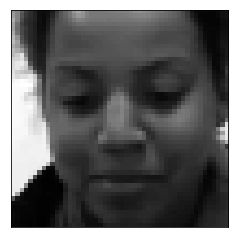

1


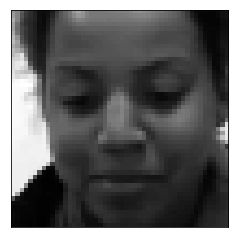

2


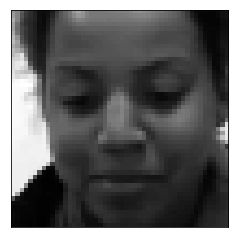

3


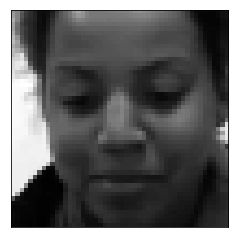

4


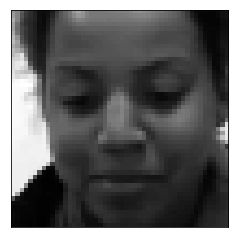

5


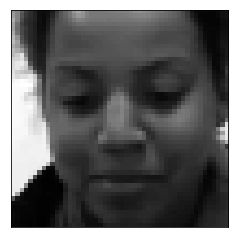

6


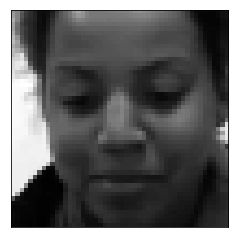

7


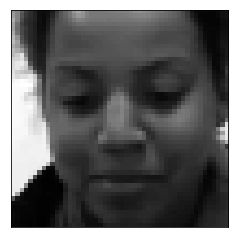

8


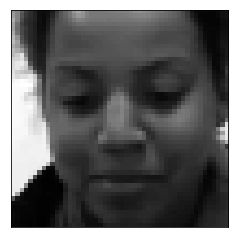

9


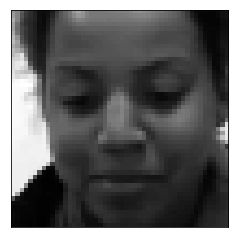

10


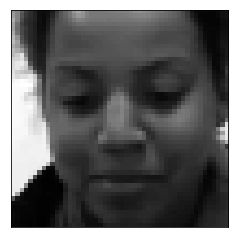

11


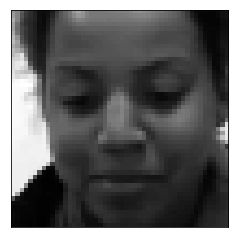

12


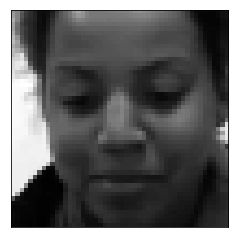

13


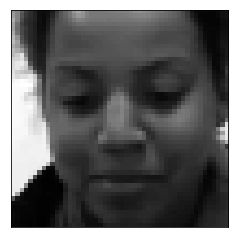

14


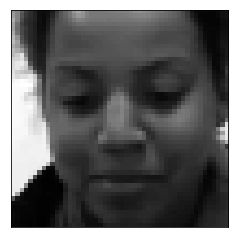

15


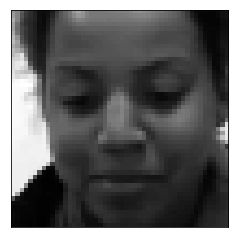

16


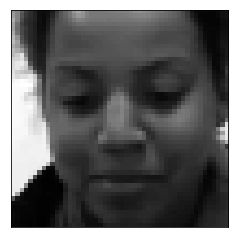

17


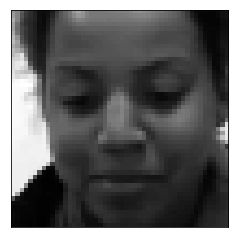

18


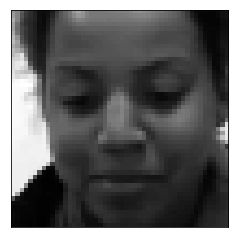

19


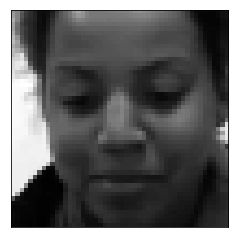

20


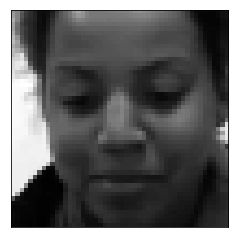

21


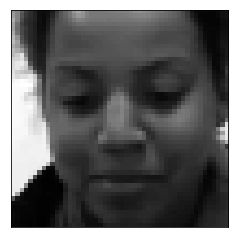

22


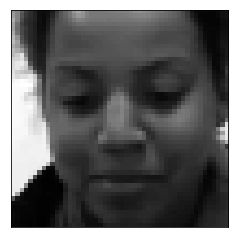

23


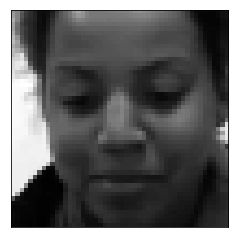

24


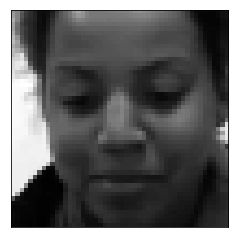

25


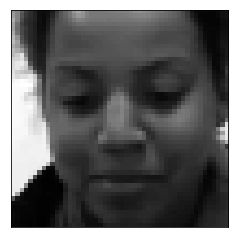

26


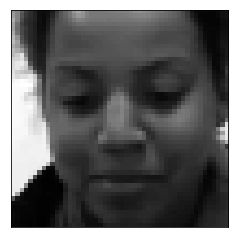

27


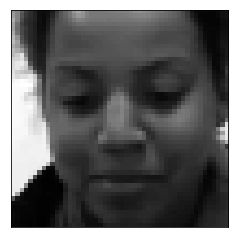

28


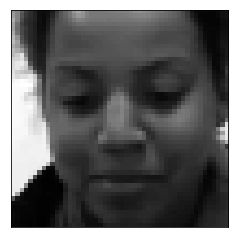

29


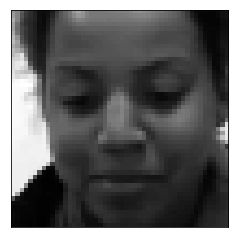

30


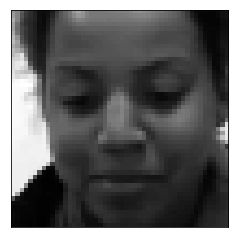

31


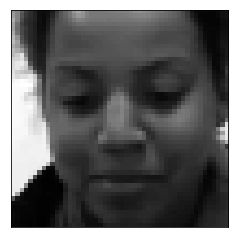

32


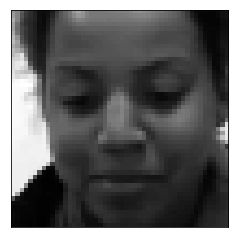

33


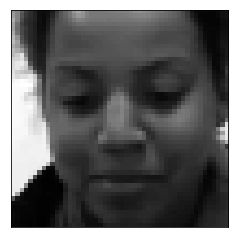

34


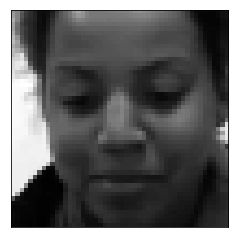

35


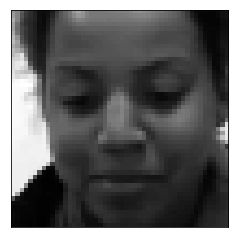

36


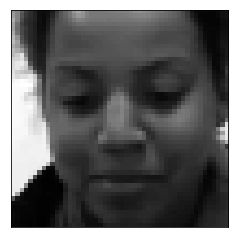

37


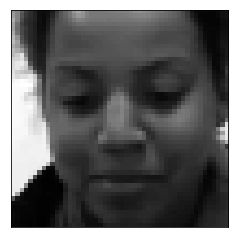

38


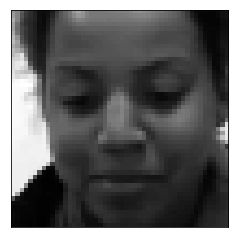

39


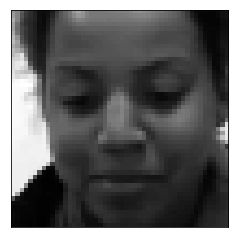

40


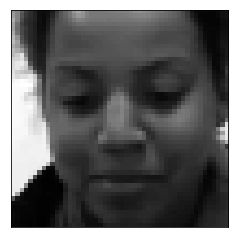

41


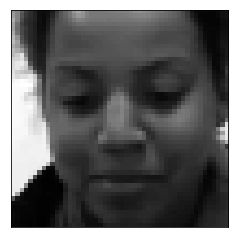

42


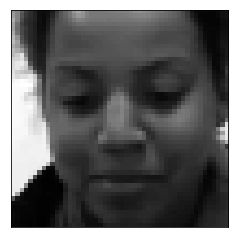

43


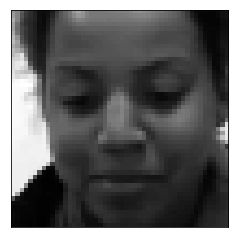

44


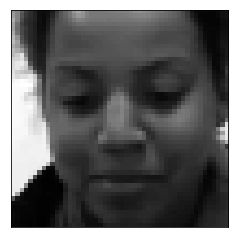

45


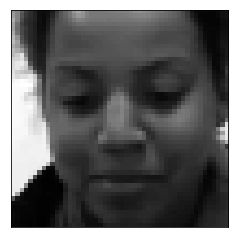

46


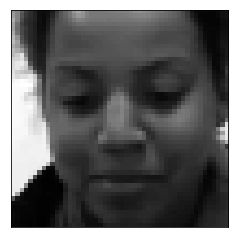

47


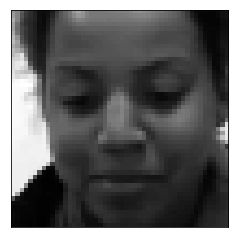

48


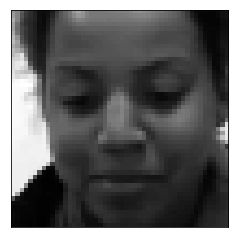

49


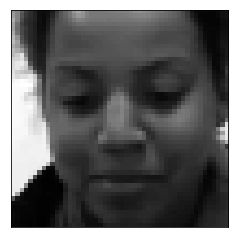

50


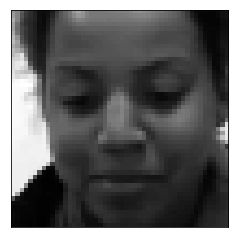

51


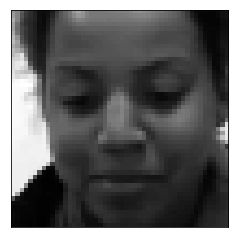

52


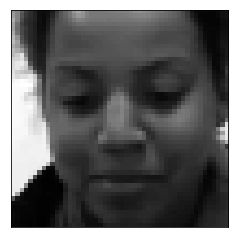

53


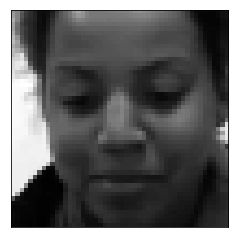

54


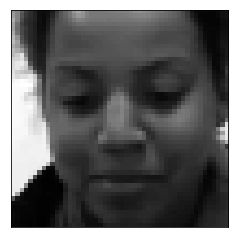

55


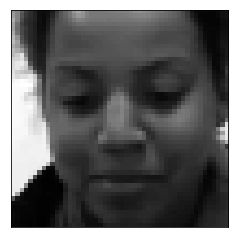

56


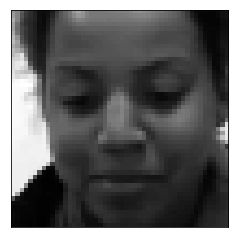

57


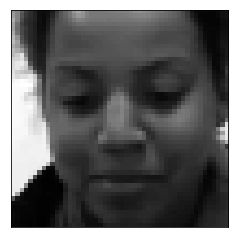

58


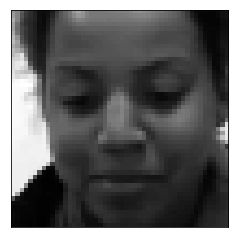

59


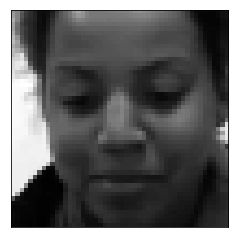

60


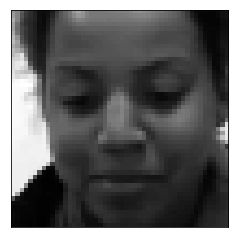

61


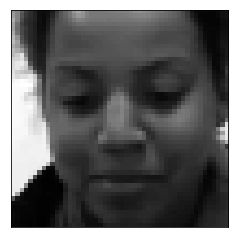

62


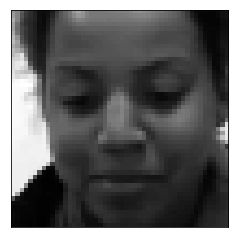

63


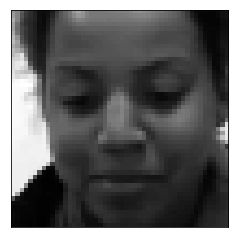

64


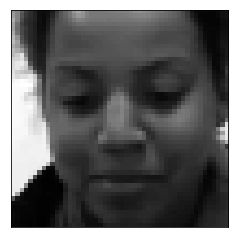

65


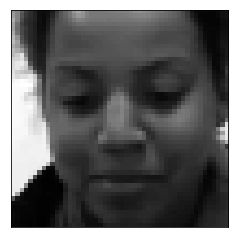

66


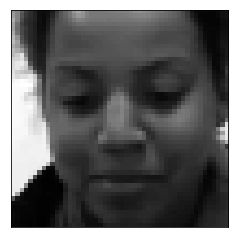

67


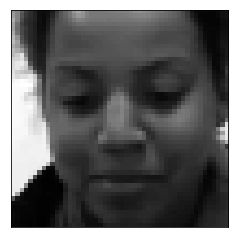

68


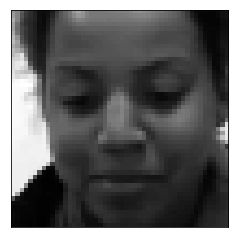

69


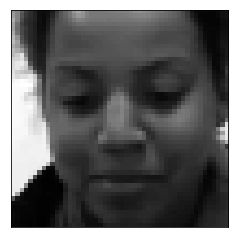

70


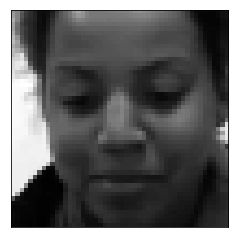

71


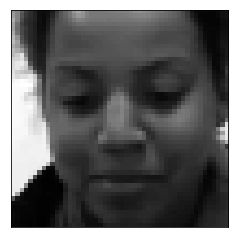

72


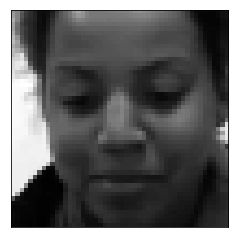

73


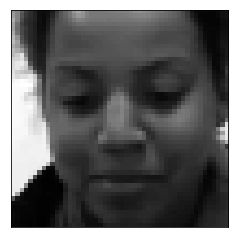

74


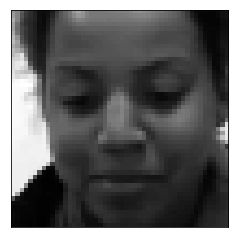

75


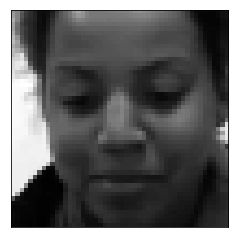

76


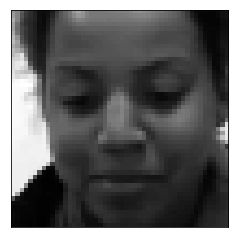

77


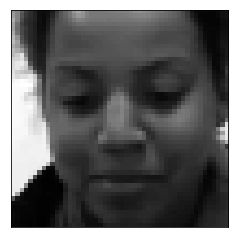

78


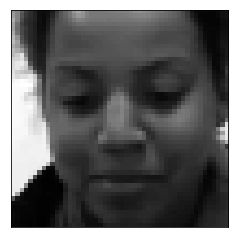

79


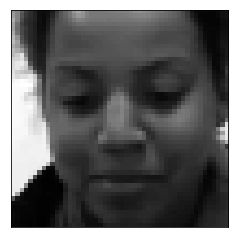

80


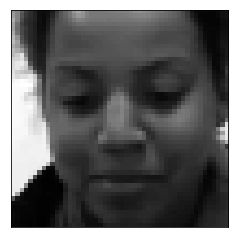

81


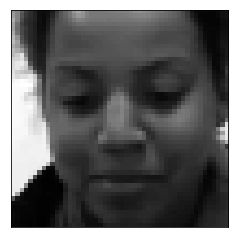

82


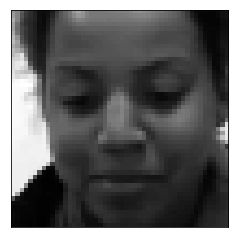

83


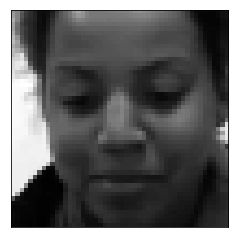

84


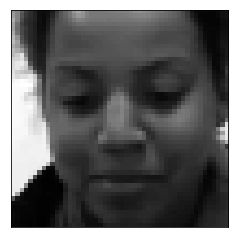

85


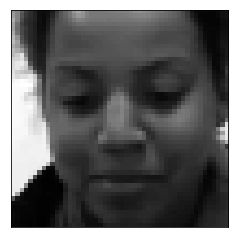

86


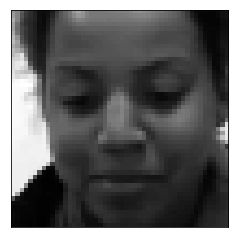

87


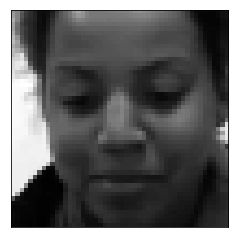

88


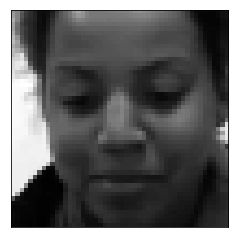

89


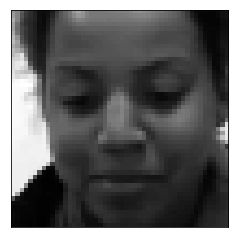

90


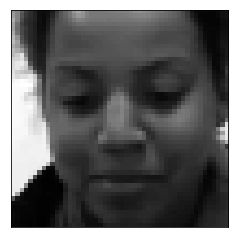

91


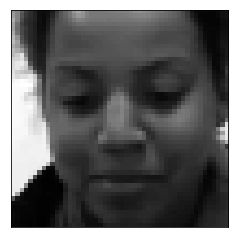

92


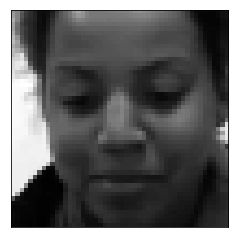

93


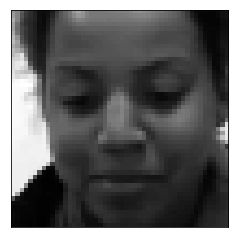

94


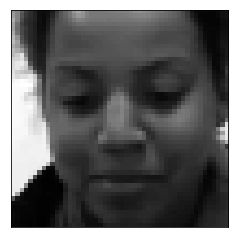

95


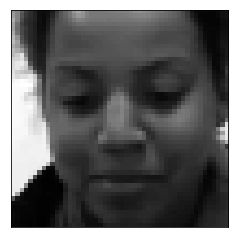

96


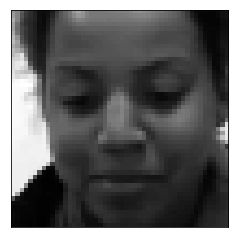

97


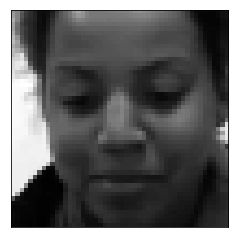

98


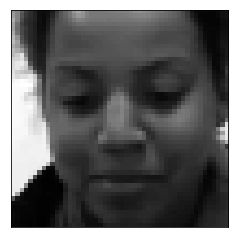

99


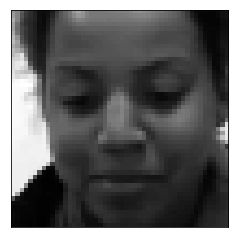

100


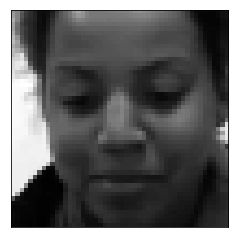

101


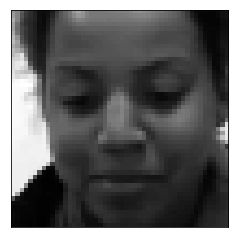

102


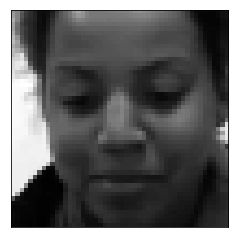

103


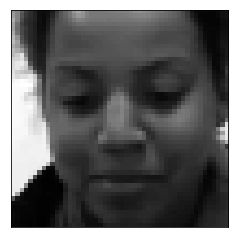

104


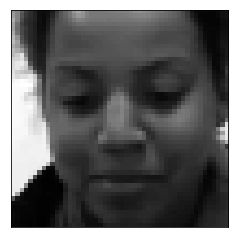

105


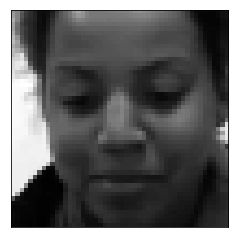

106


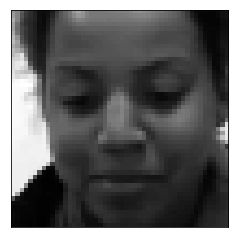

107


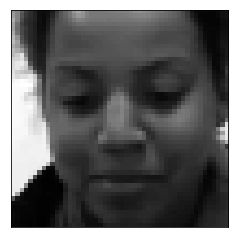

108


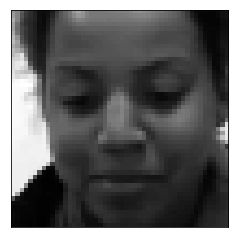

109


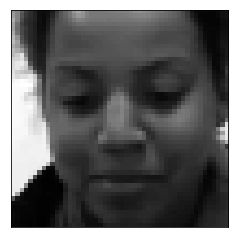

110


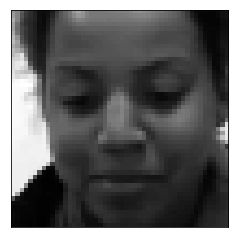

111


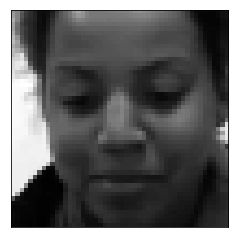

112


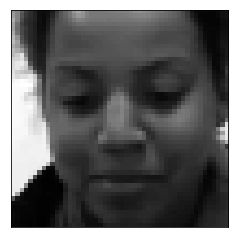

113


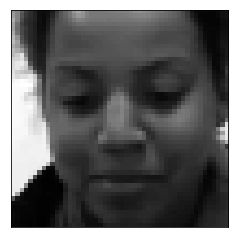

114


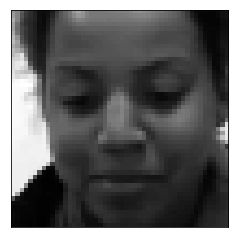

115


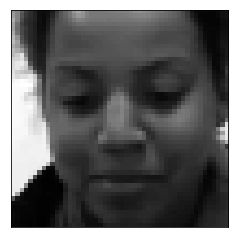

116


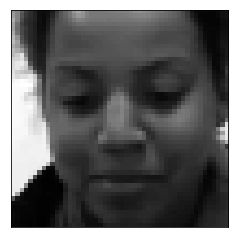

117


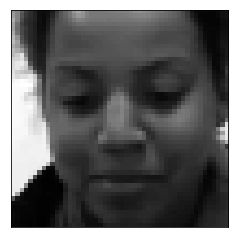

118


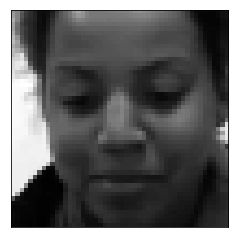

119


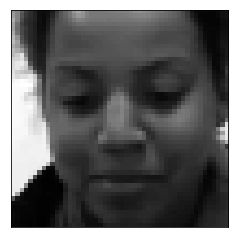

120


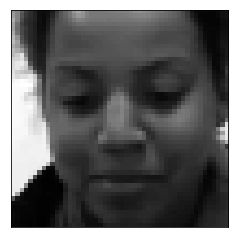

121


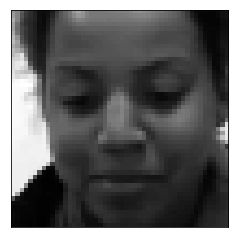

122


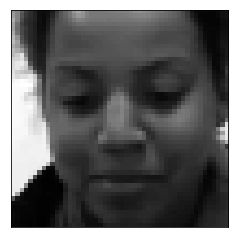

123


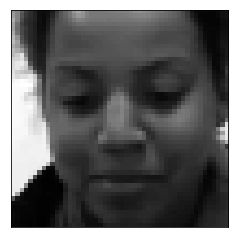

124


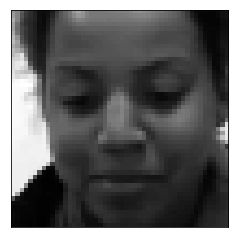

125


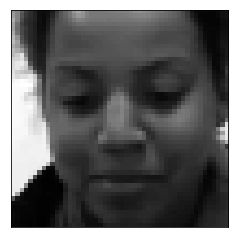

126


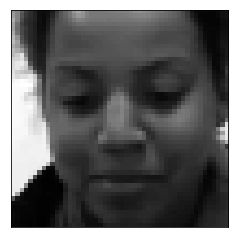

127


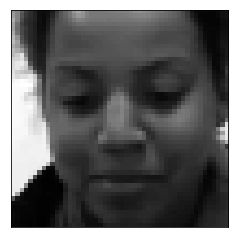

128


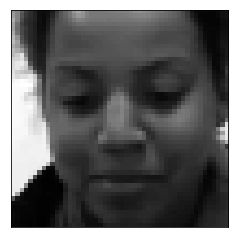

129


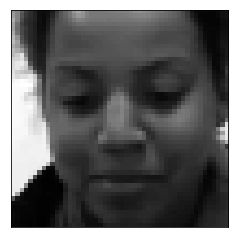

130


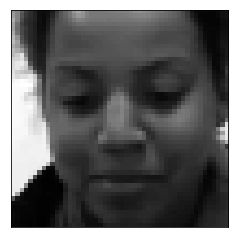

131


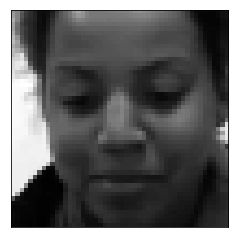

132


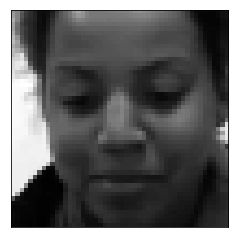

133


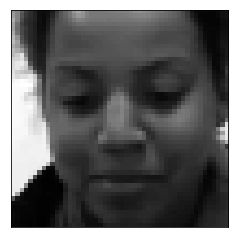

134


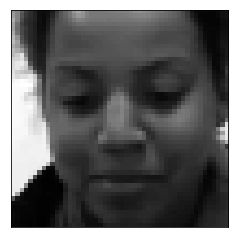

135


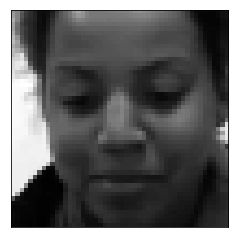

136


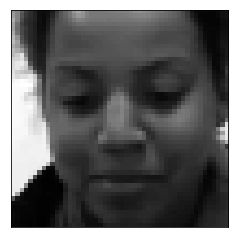

137


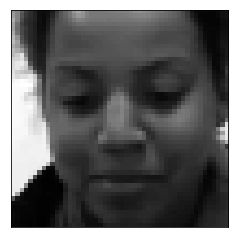

138


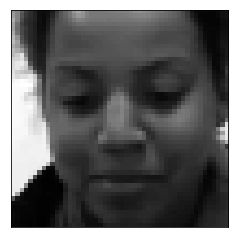

139


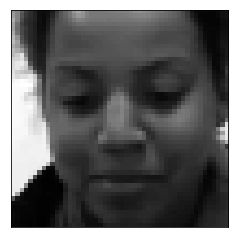

140


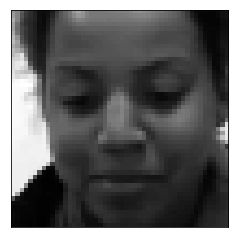

141


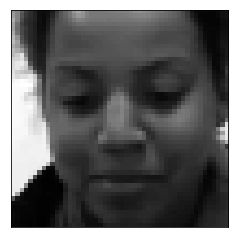

142


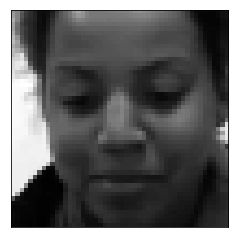

143


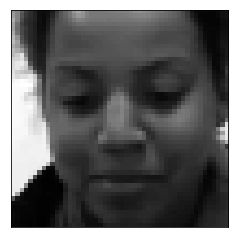

144


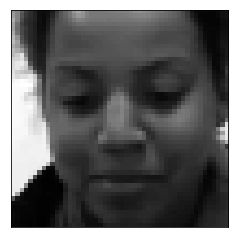

145


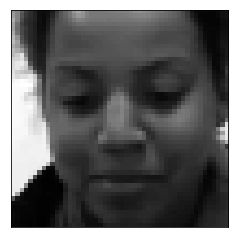

146


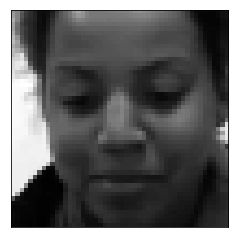

147


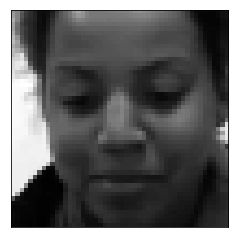

148


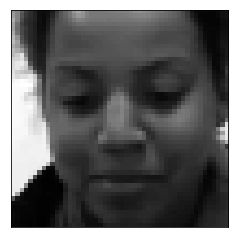

149


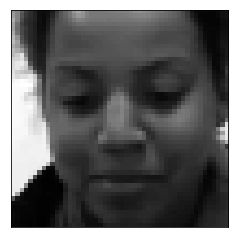

150


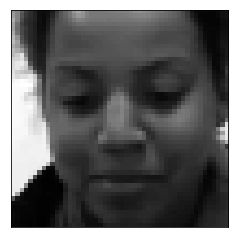

151


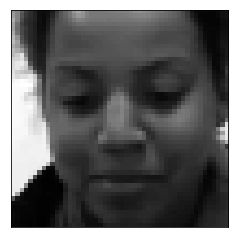

152


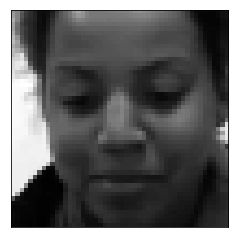

153


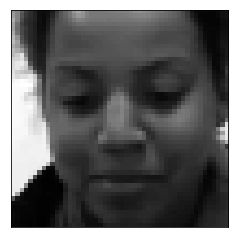

154


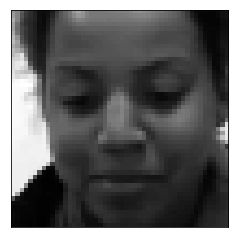

155


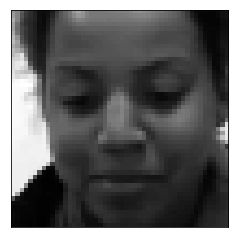

156


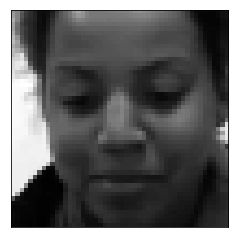

157


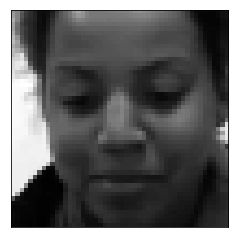

158


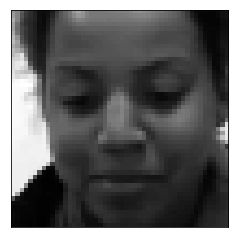

159


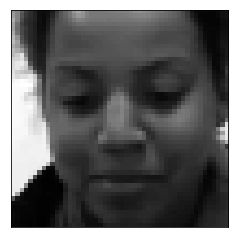

160


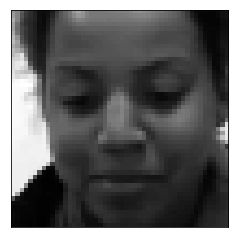

161


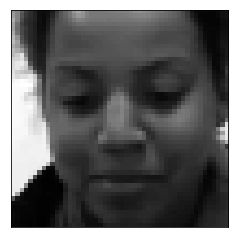

162


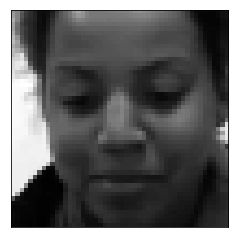

163


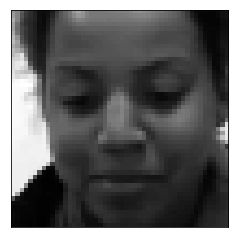

164


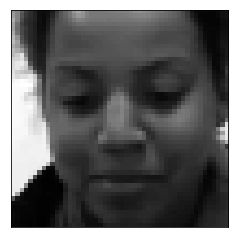

165


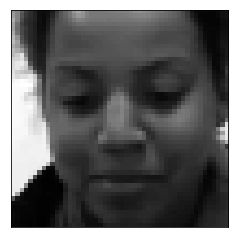

166


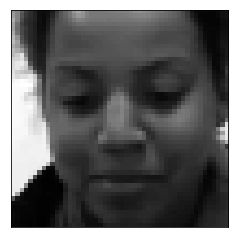

167


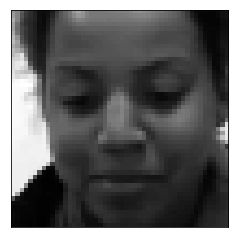

168


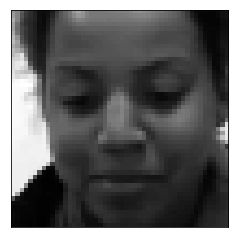

169


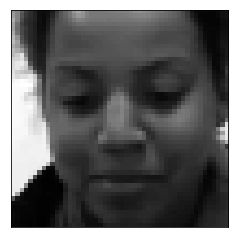

170


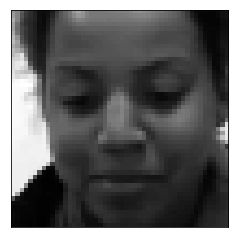

171


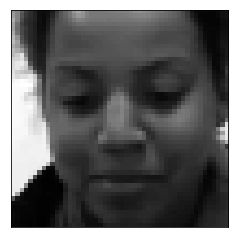

172


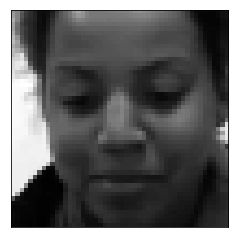

173


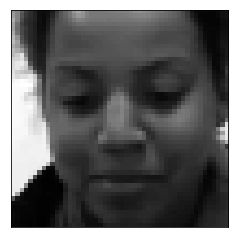

174


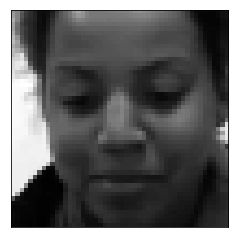

175


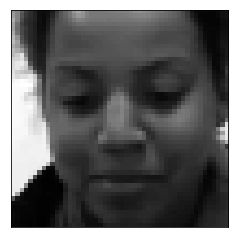

176


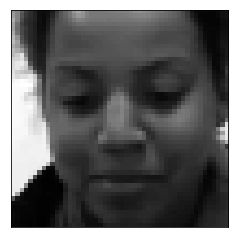

177


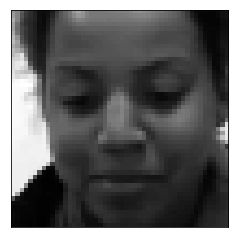

178


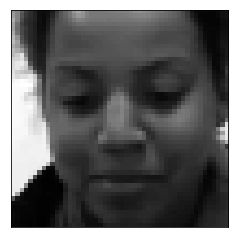

179


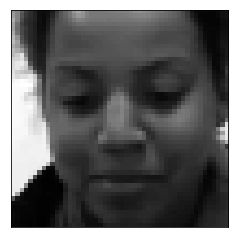

180


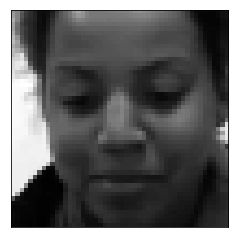

181


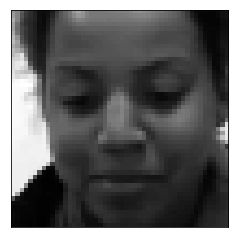

182


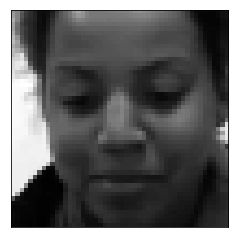

183


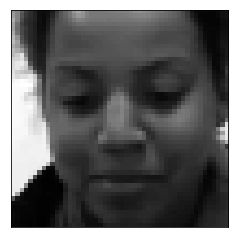

184


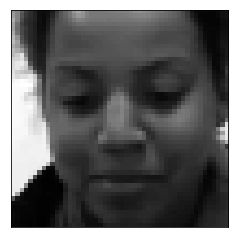

185


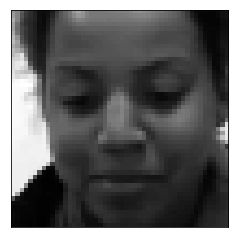

186


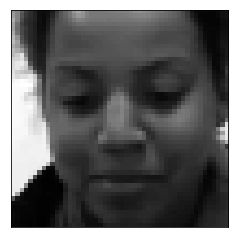

187


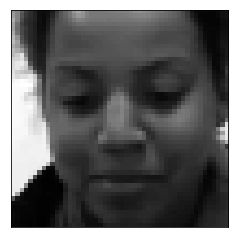

188


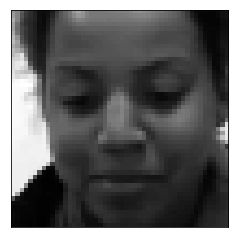

189


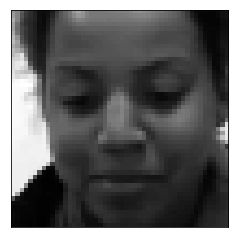

190


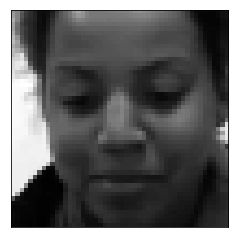

191


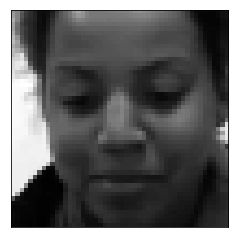

192


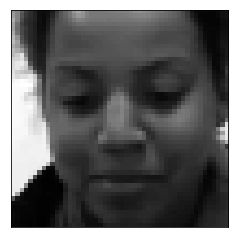

193


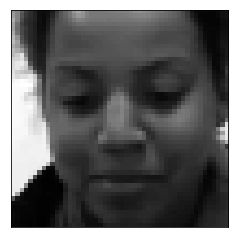

194


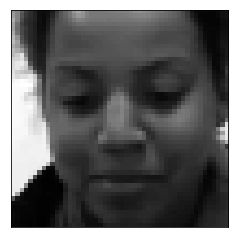

195


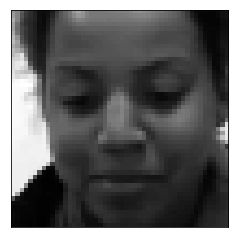

196


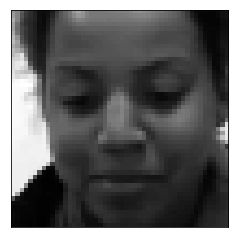

197


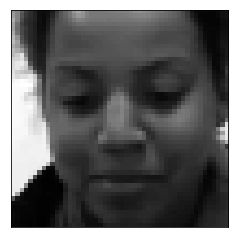

198


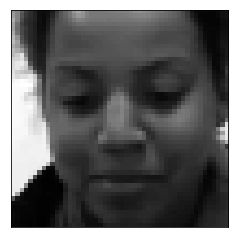

199


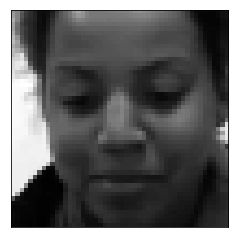

200


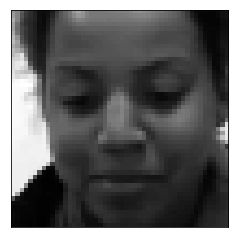

201


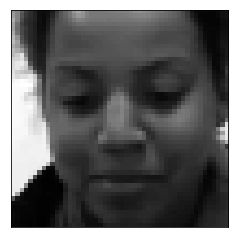

202


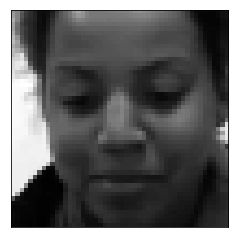

203


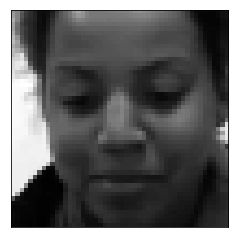

204


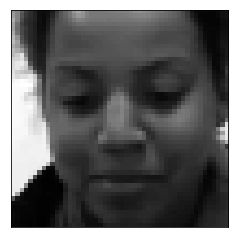

205


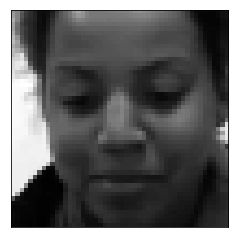

206


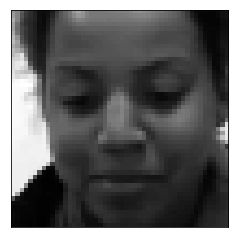

207


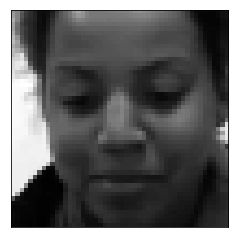

208


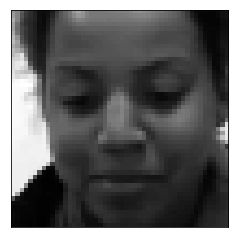

209


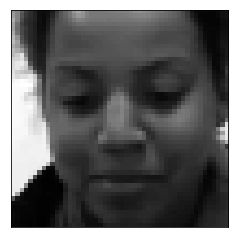

210


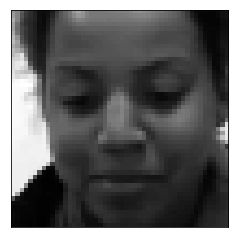

211


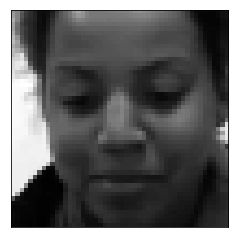

212


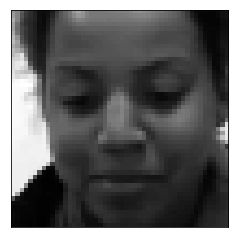

213


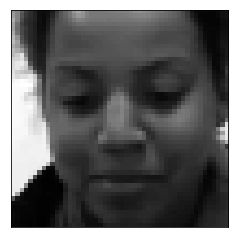

214


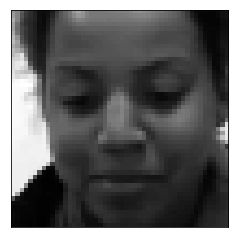

215


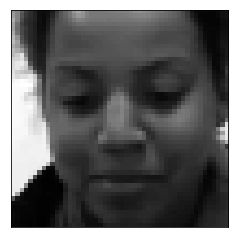

216


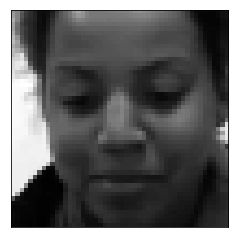

217


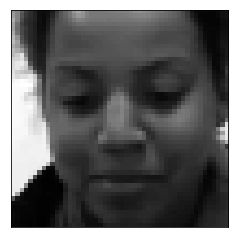

218


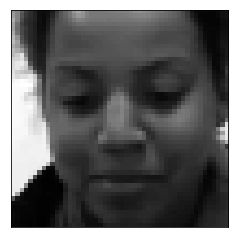

219


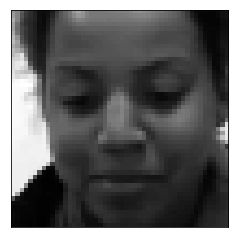

220


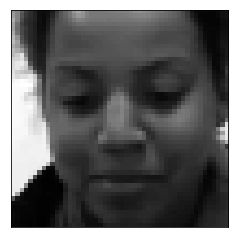

221


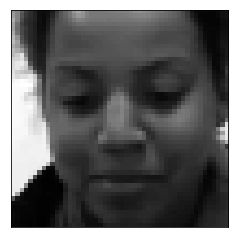

222


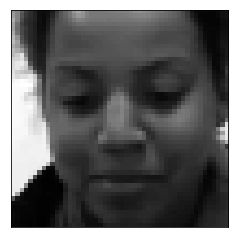

223


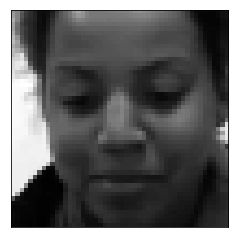

224


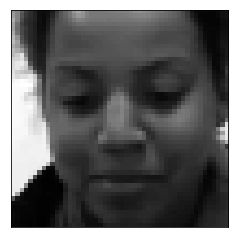

225


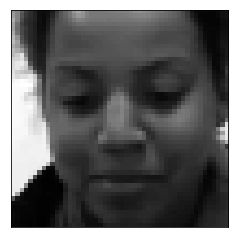

226


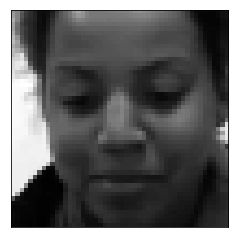

227


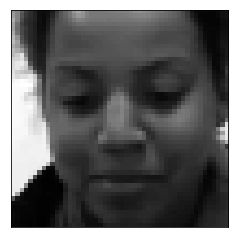

228


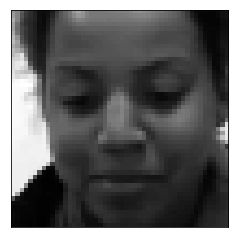

229


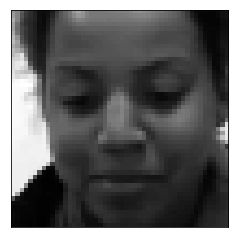

230


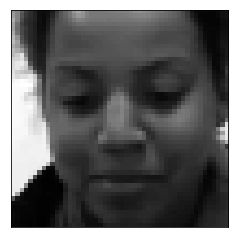

231


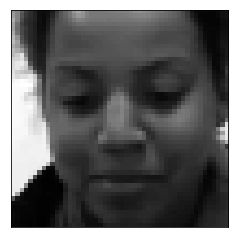

232


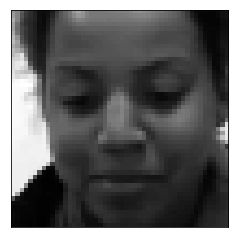

233


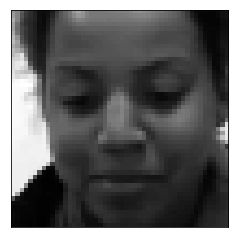

234


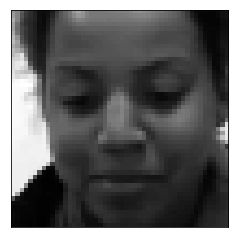

235


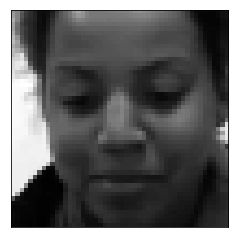

236


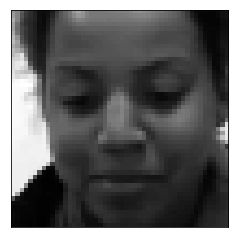

237


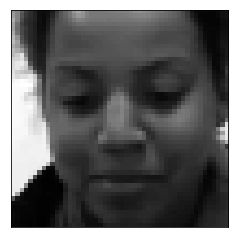

238


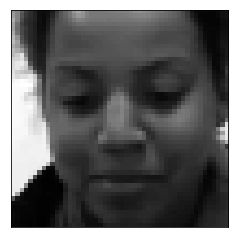

239


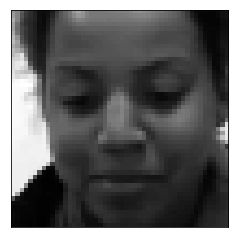

240


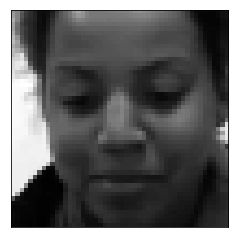

241


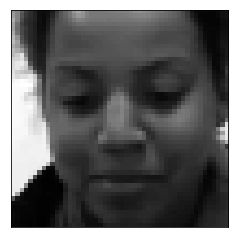

242


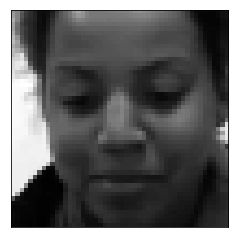

243


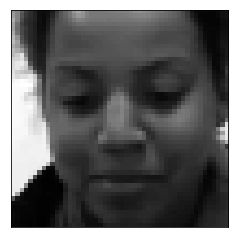

244


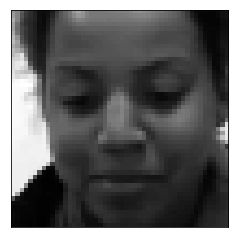

245


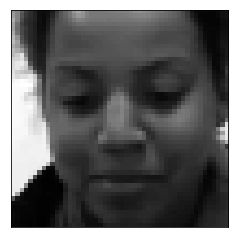

246


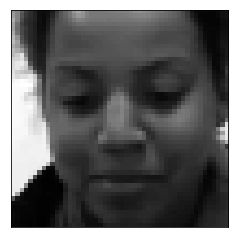

247


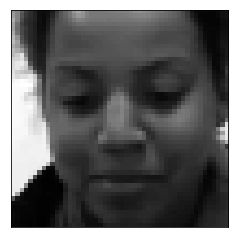

248


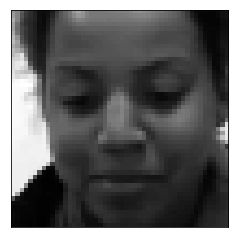

249


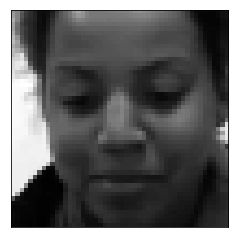

250


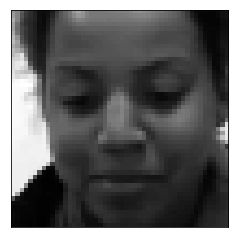

251


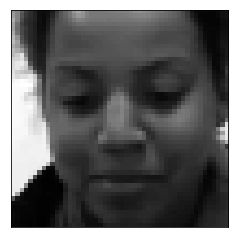

252


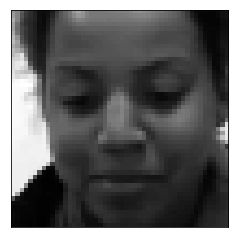

253


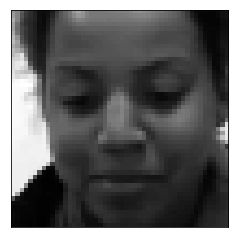

254


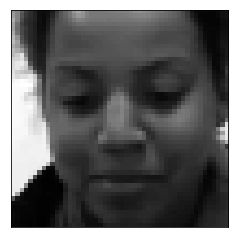

255


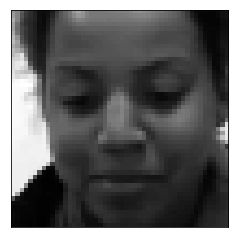

256


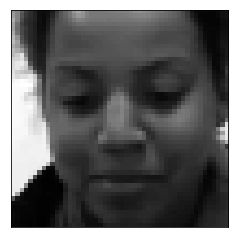

257


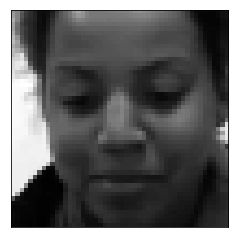

258


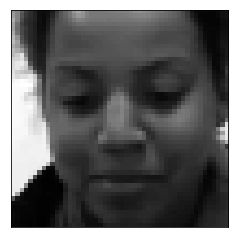

259


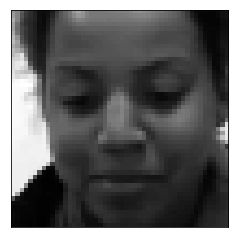

260


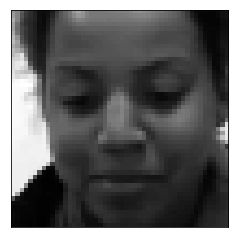

261


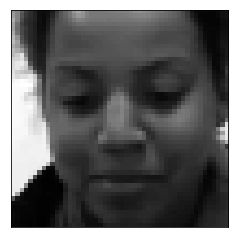

262


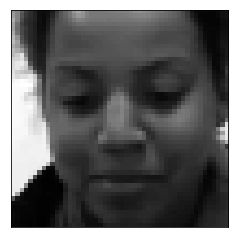

263


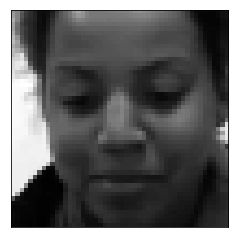

264


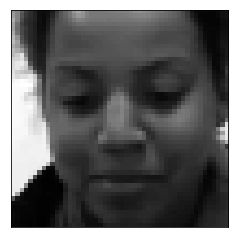

265


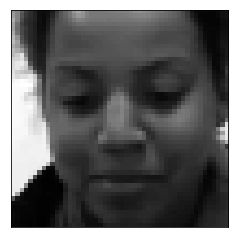

266


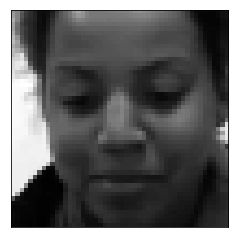

267


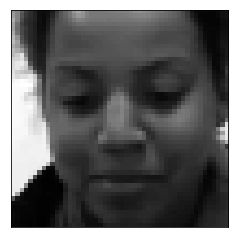

268


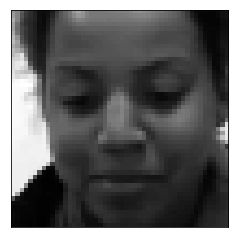

269


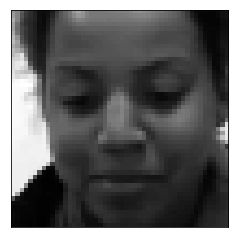

270


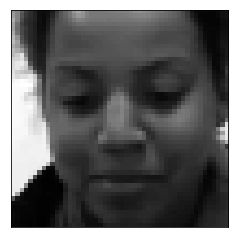

271


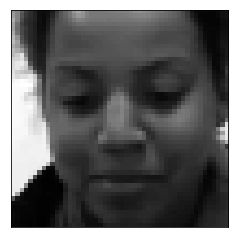

272


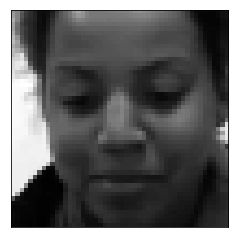

273


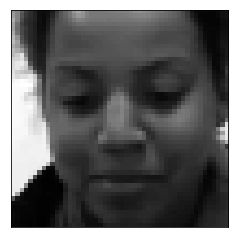

274


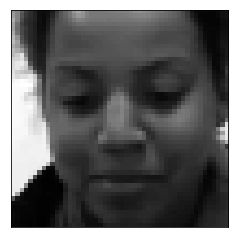

275


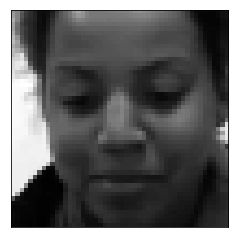

276


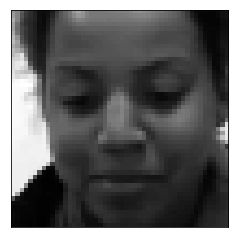

277


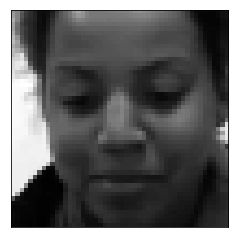

278


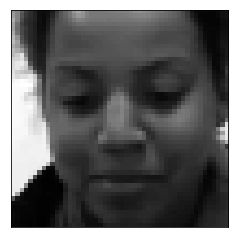

279


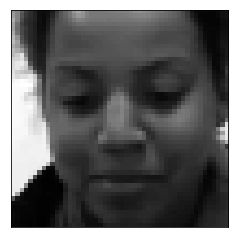

280


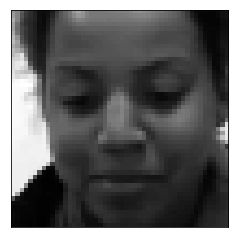

281


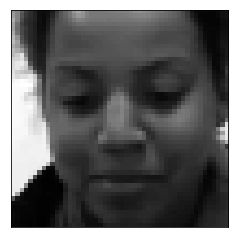

282


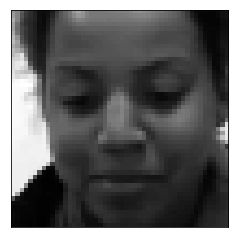

283


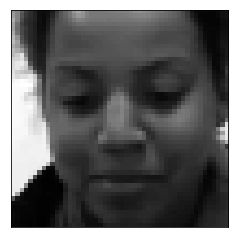

284


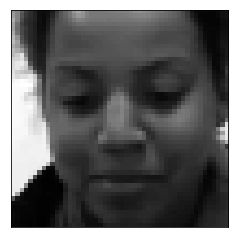

285


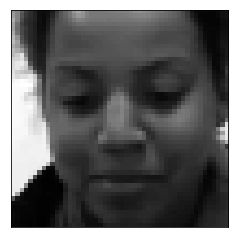

286


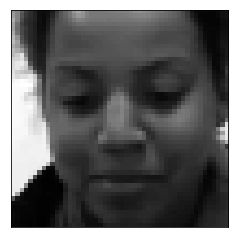

287


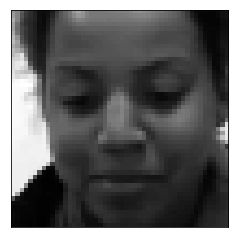

288


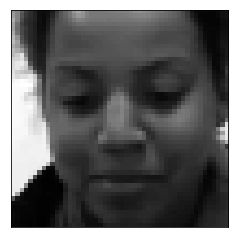

289


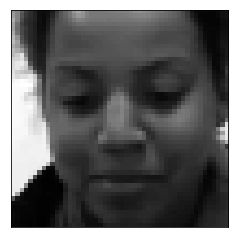

290


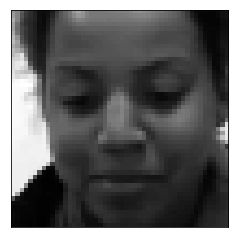

291


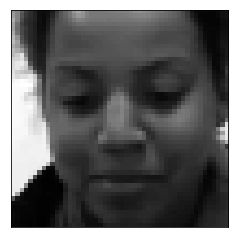

292


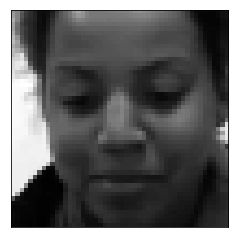

293


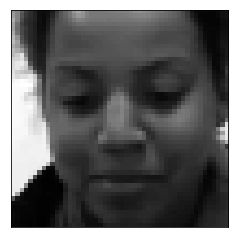

294


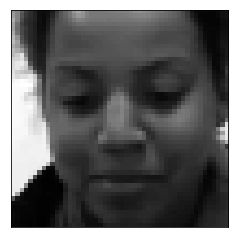

295


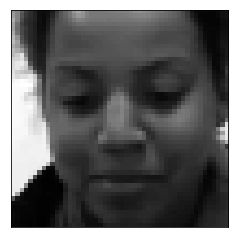

296


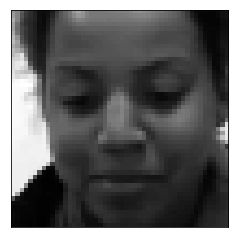

297


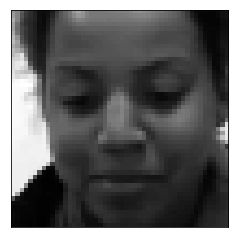

298


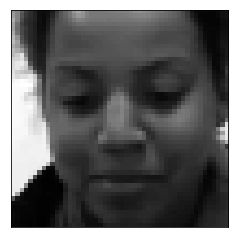

299


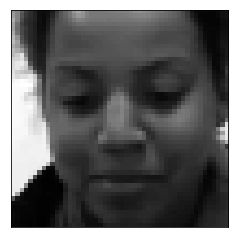

300


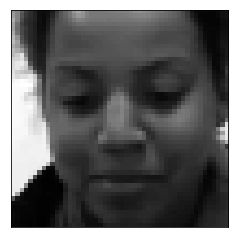

301


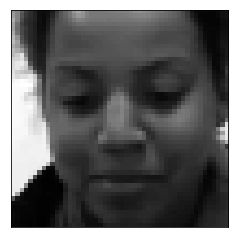

302


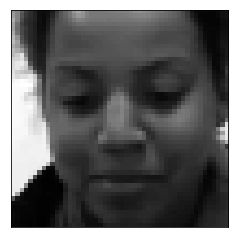

303


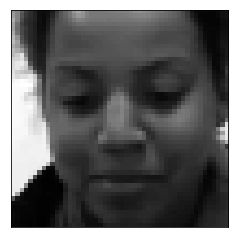

304


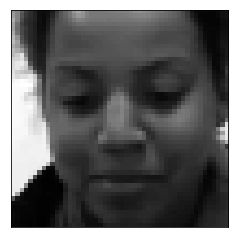

305


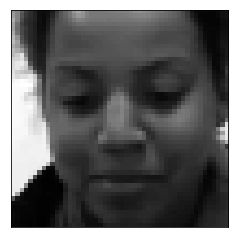

306


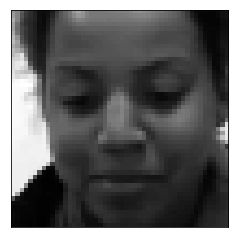

307


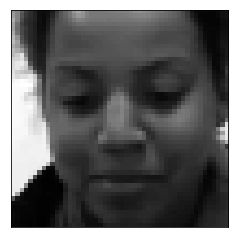

308


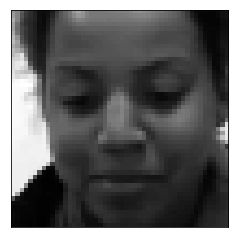

309


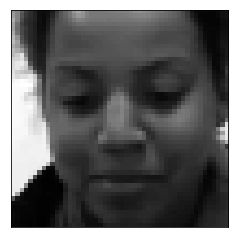

310


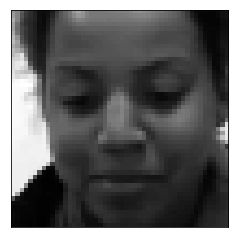

311


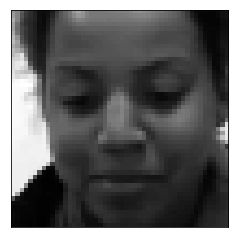

312


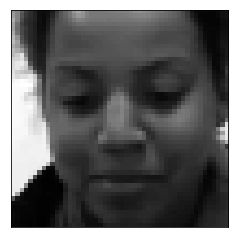

313


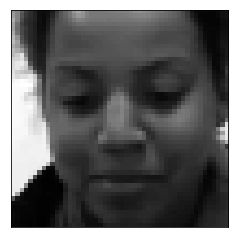

314


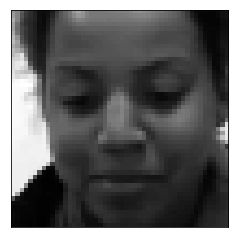

315


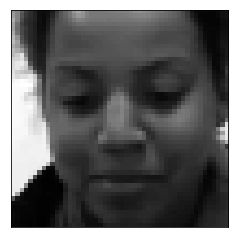

316


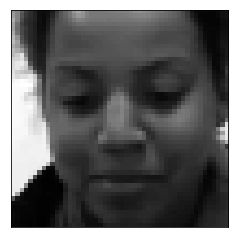

317


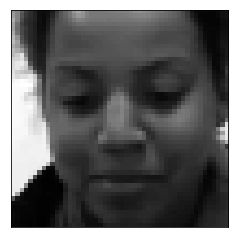

318


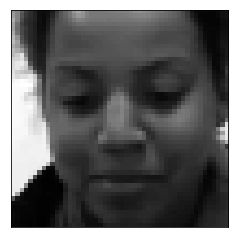

319


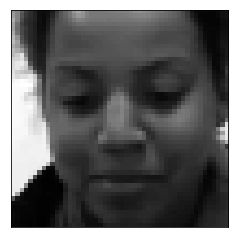

320


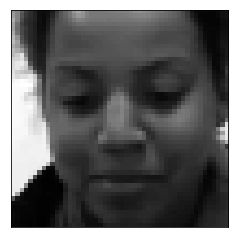

321


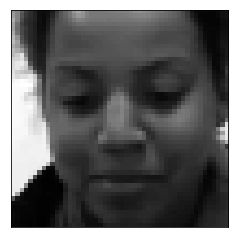

322


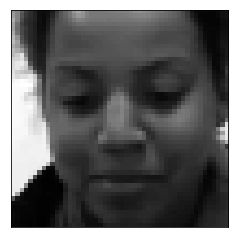

323


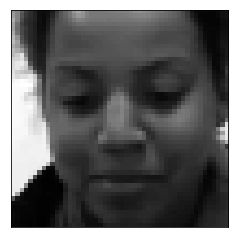

324


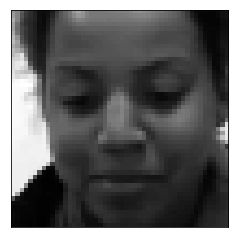

325


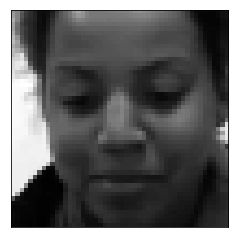

326


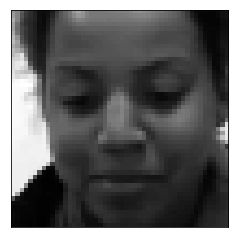

327


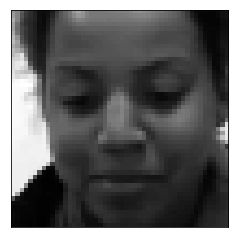

328


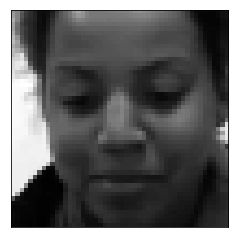

329


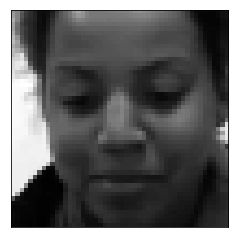

330


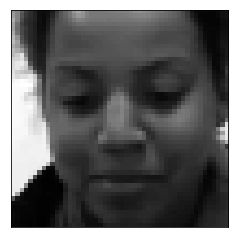

331


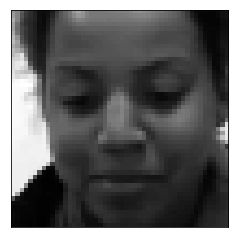

332


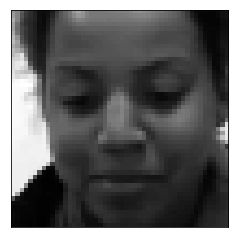

333


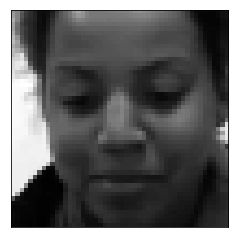

334


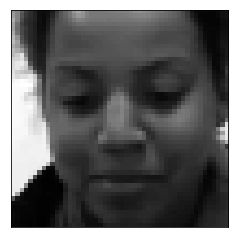

335


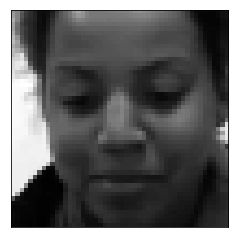

336


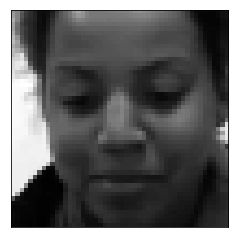

337


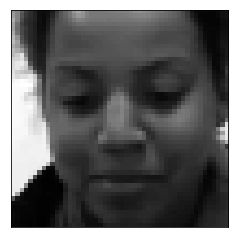

338


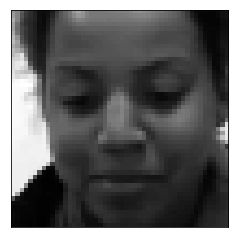

339


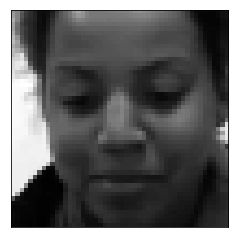

340


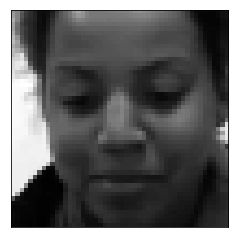

341


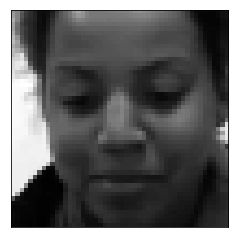

342


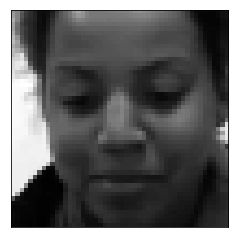

343


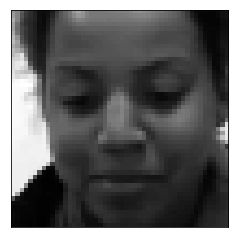

344


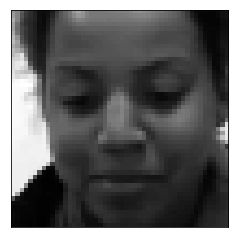

345


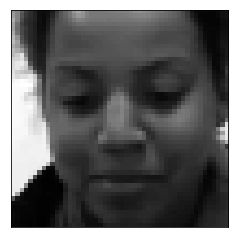

346


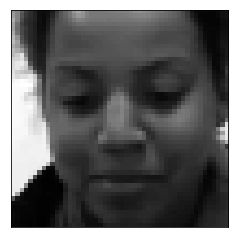

347


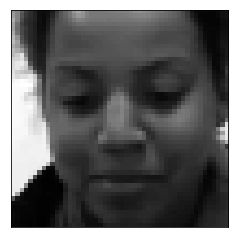

348


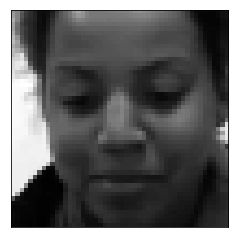

349


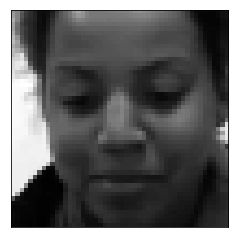

350


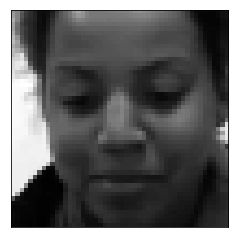

351


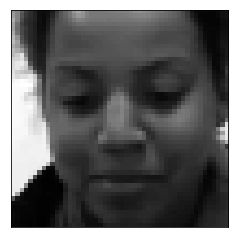

352


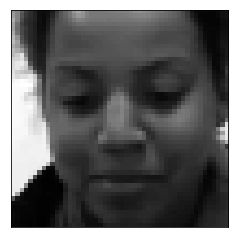

353


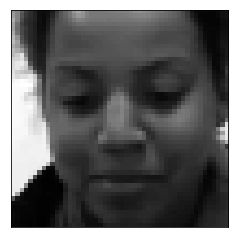

354


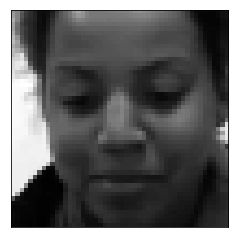

355


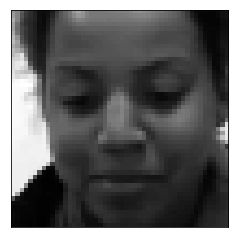

356


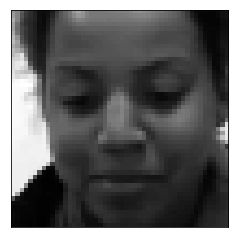

357


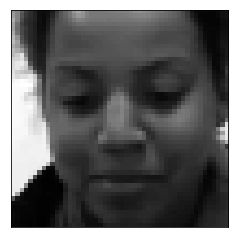

358


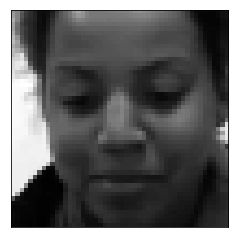

359


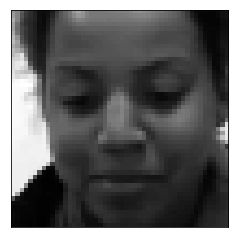

360


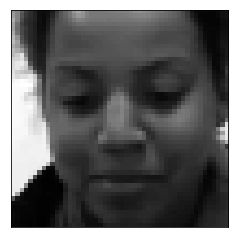

361


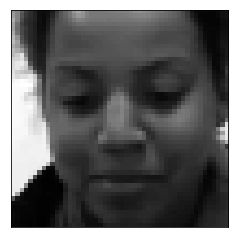

362


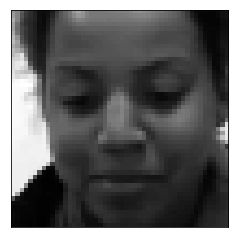

363


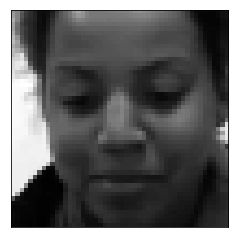

364


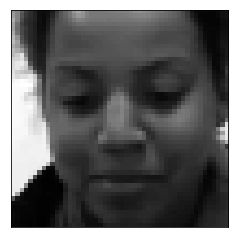

365


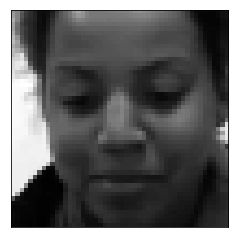

366


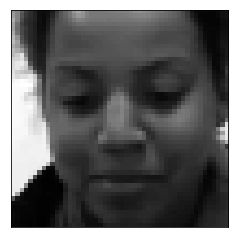

367


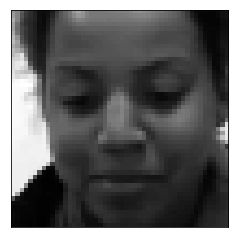

368


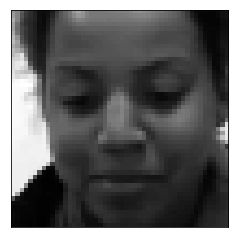

369


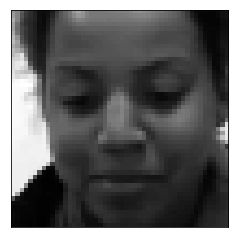

370


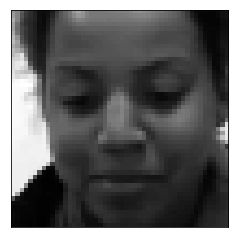

371


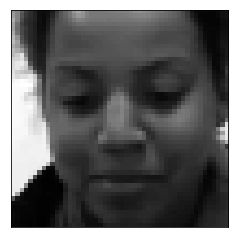

372


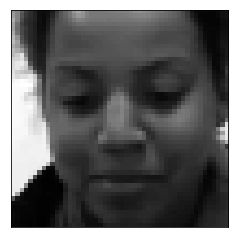

373


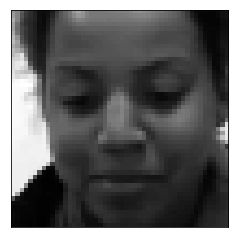

374


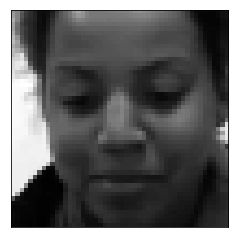

375


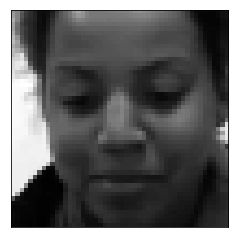

376


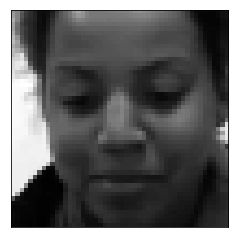

377


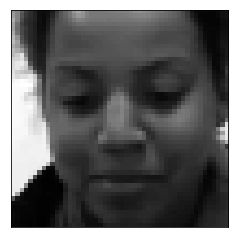

378


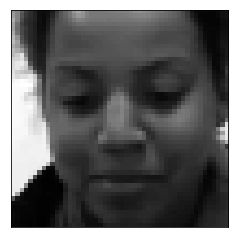

379


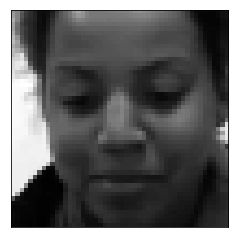

380


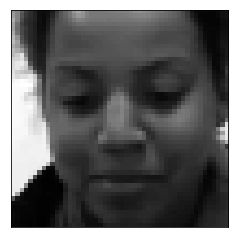

381


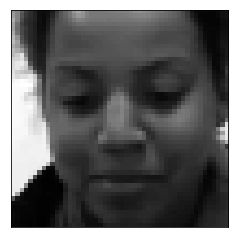

382


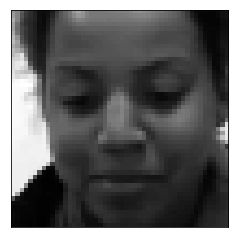

383


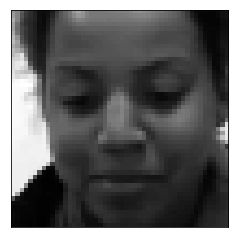

384


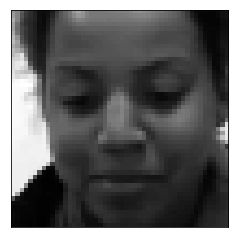

385


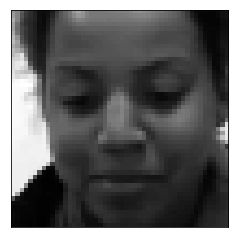

386


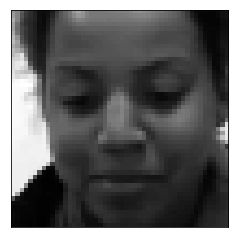

387


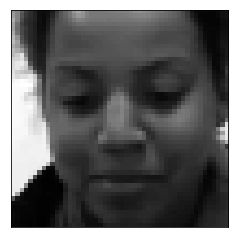

388


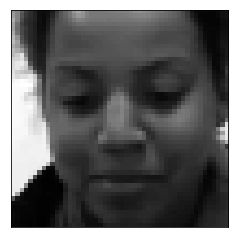

389


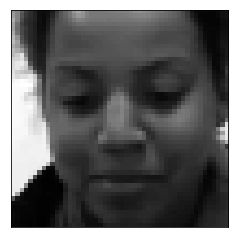

390


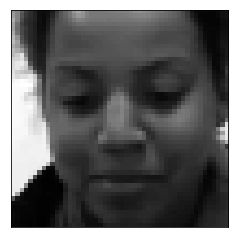

391


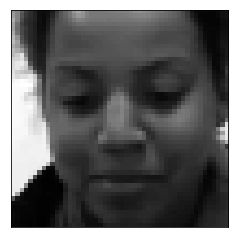

392


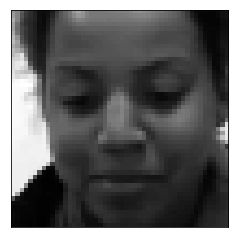

393


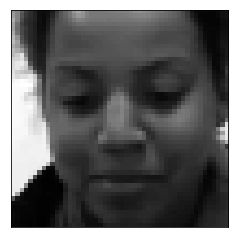

394


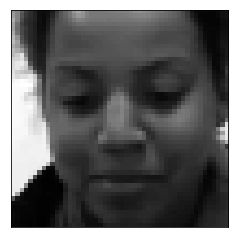

395


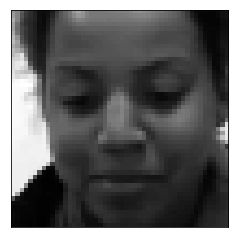

396


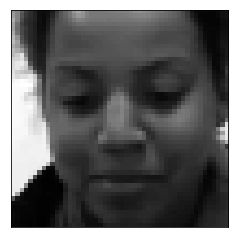

397


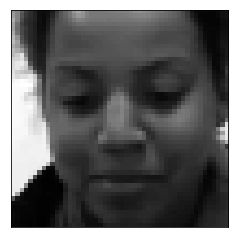

398


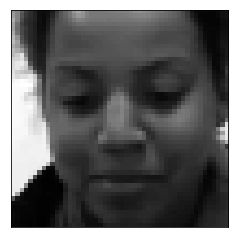

399


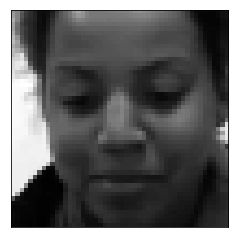

400


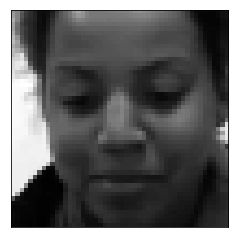

401


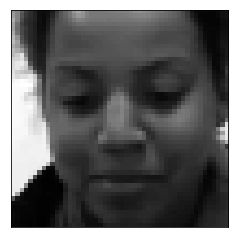

402


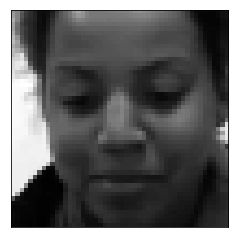

403


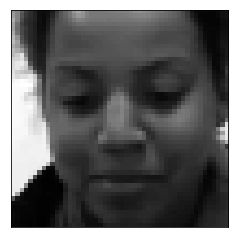

404


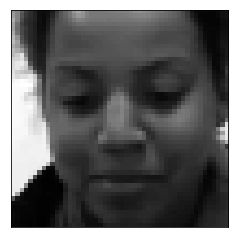

405


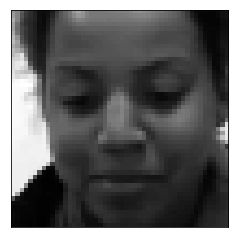

406


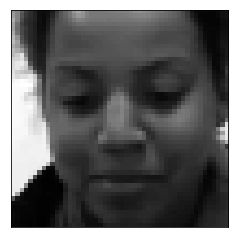

407


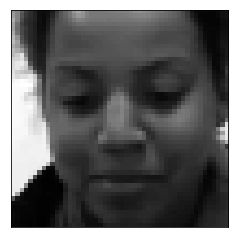

408


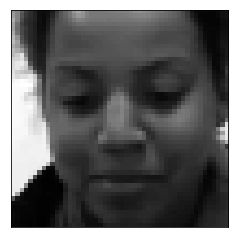

409


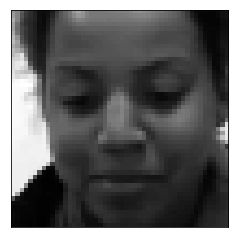

410


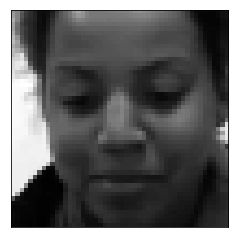

411


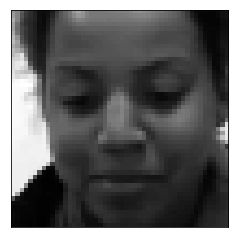

412


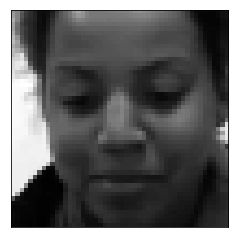

413


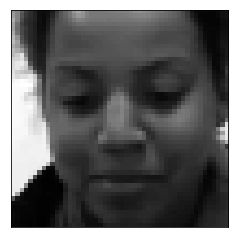

414


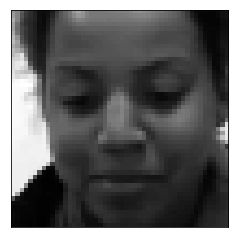

415


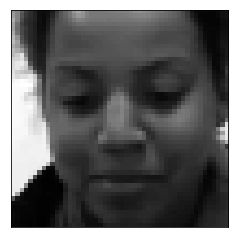

416


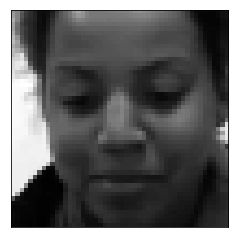

417


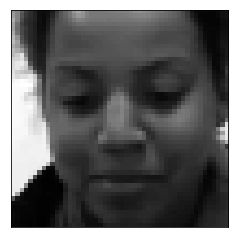

418


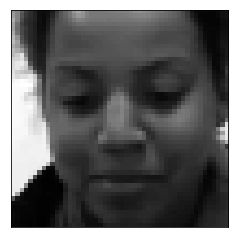

419


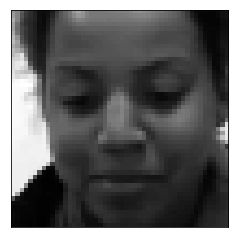

420


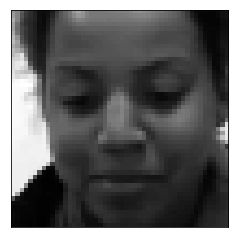

421


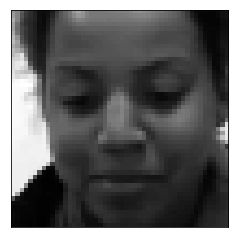

422


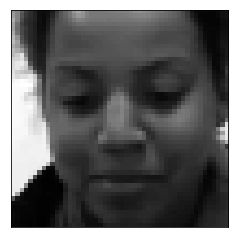

423


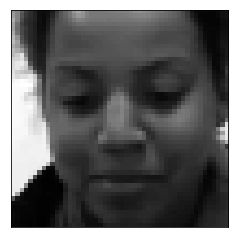

424


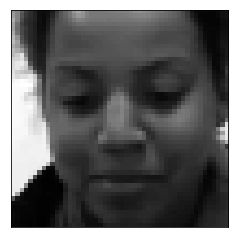

425


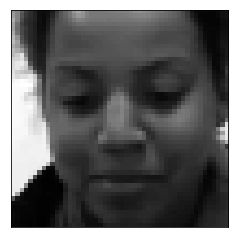

426


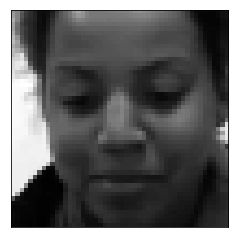

427


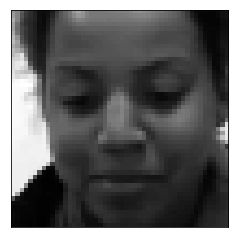

428


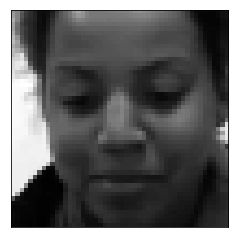

429


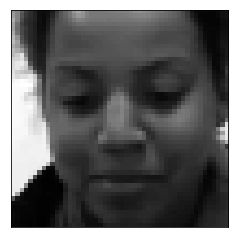

430


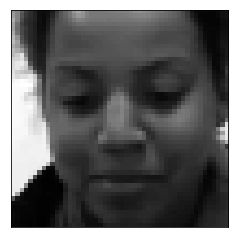

431


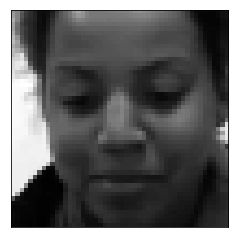

432


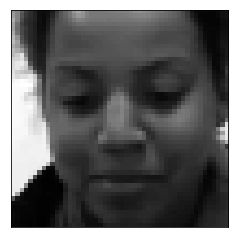

433


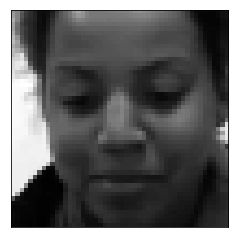

434


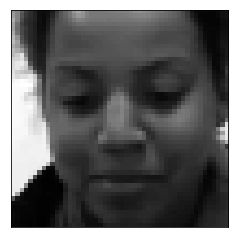

435


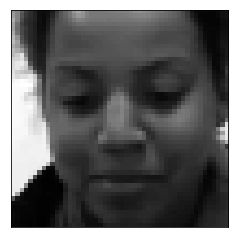

436


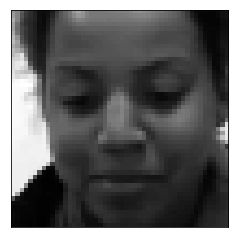

437


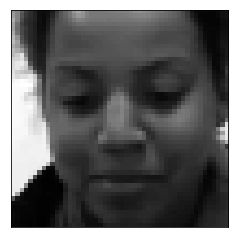

438


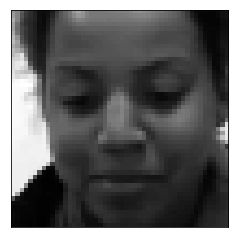

439


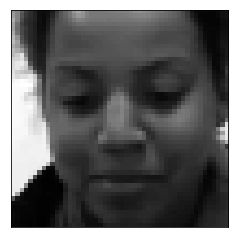

440


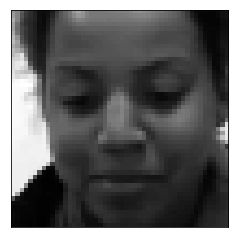

441


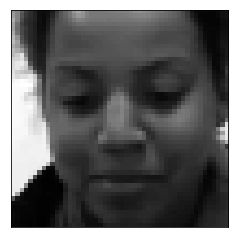

442


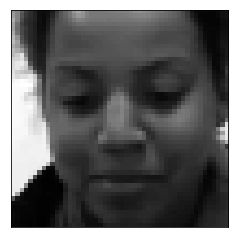

443


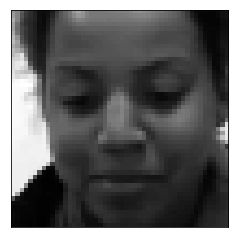

444


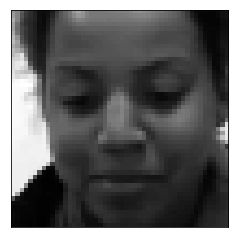

445


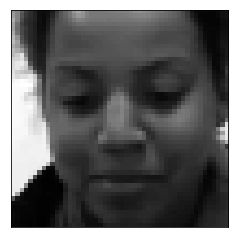

446


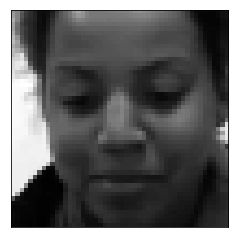

447


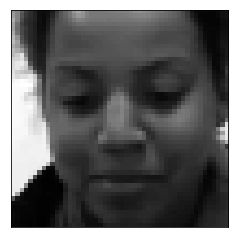

448


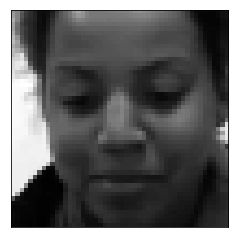

449


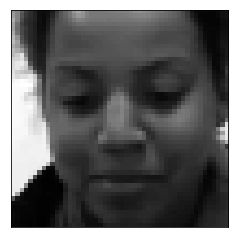

450


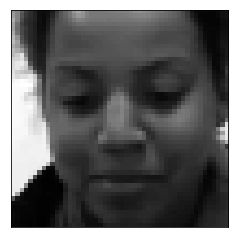

451


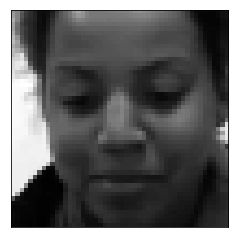

452


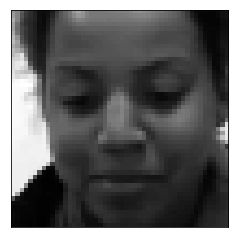

453


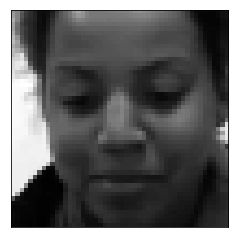

454


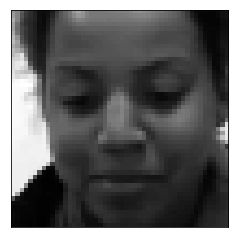

455


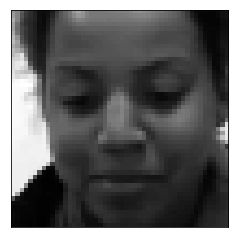

456


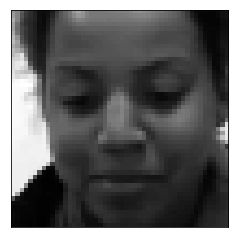

457


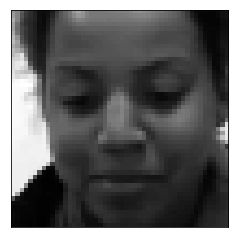

458


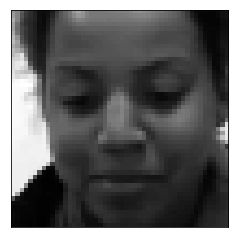

459


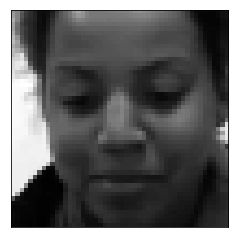

460


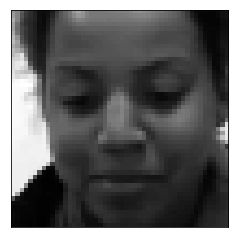

461


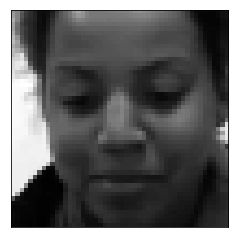

462


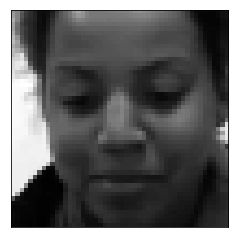

463


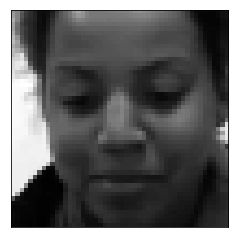

464


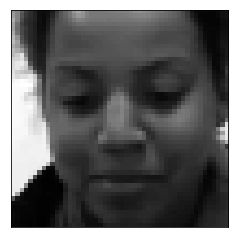

465


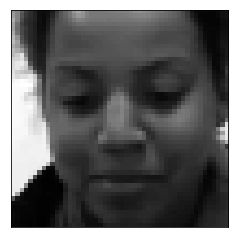

466


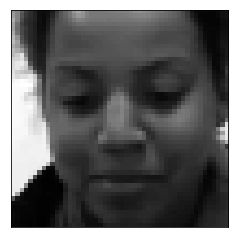

467


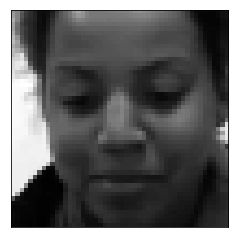

468


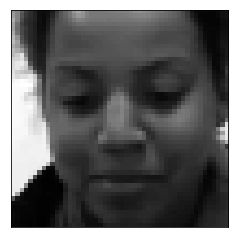

469


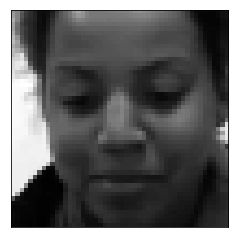

470


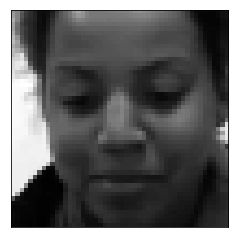

471


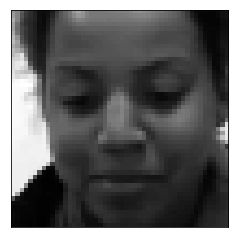

472


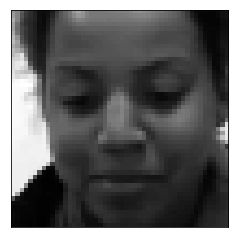

473


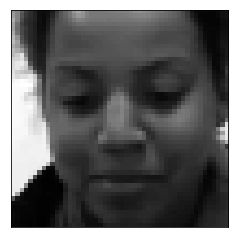

474


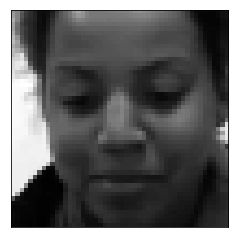

475


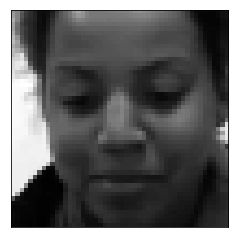

476


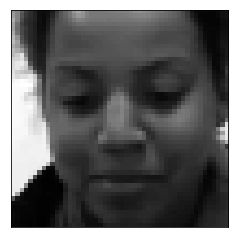

477


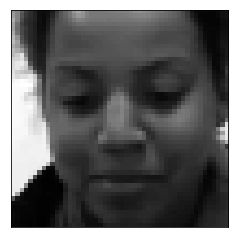

478


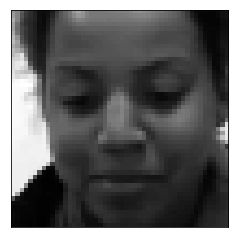

479


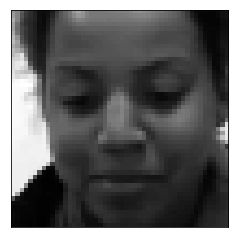

480


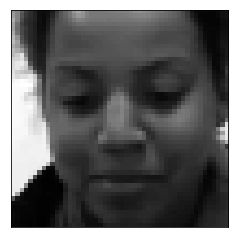

481


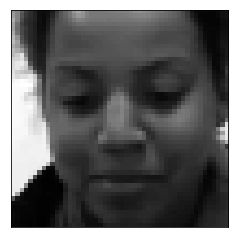

482


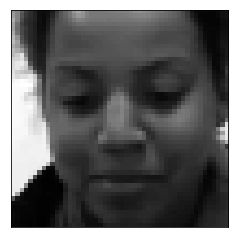

483


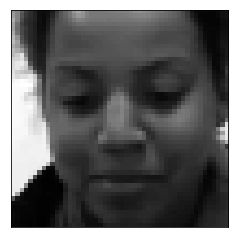

484


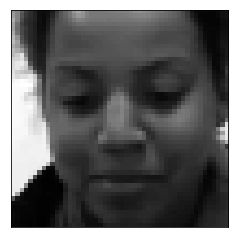

485


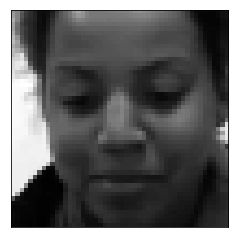

486


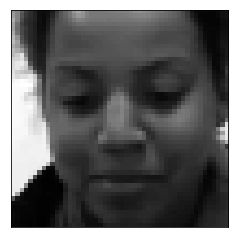

487


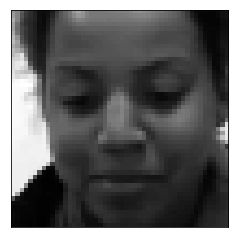

488


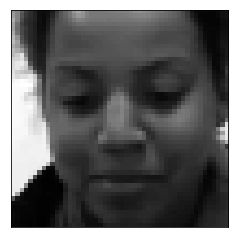

489


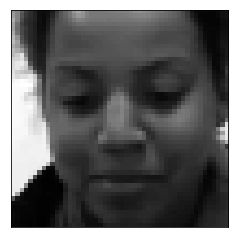

490


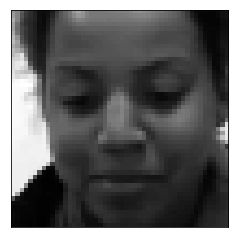

491


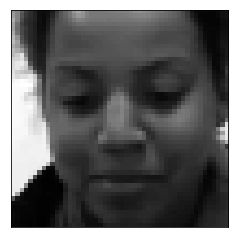

492


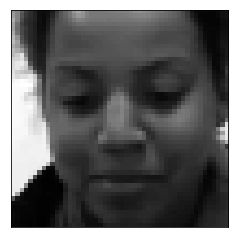

493


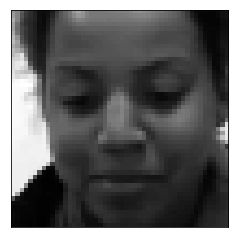

494


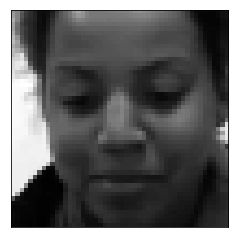

495


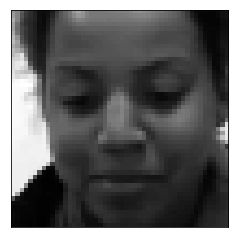

496


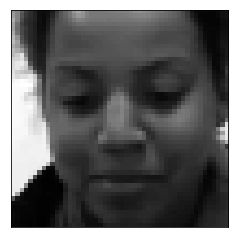

497


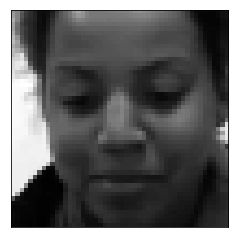

498


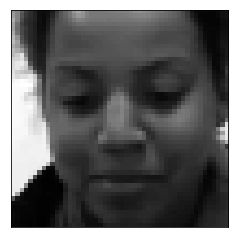

499


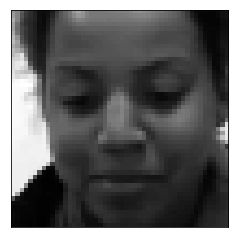

500


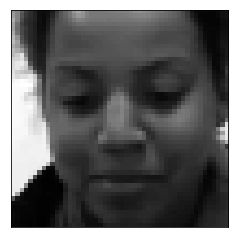

501


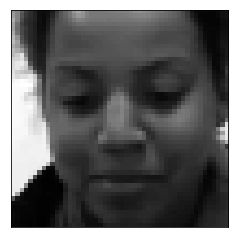

502


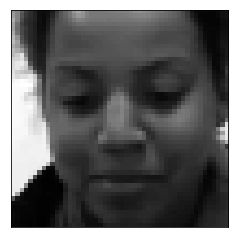

503


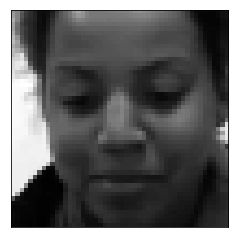

504


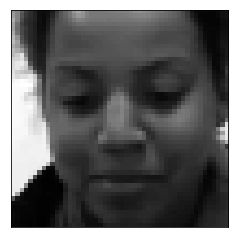

505


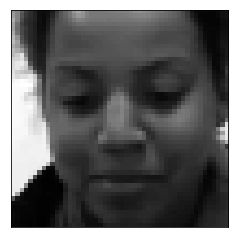

506


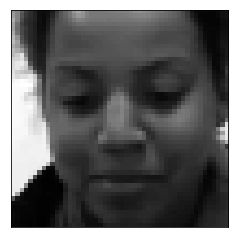

507


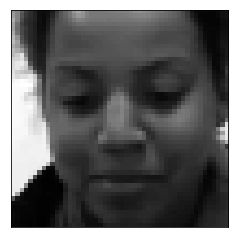

508


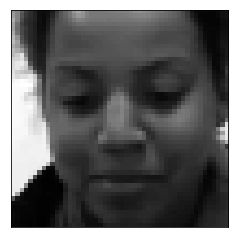

509


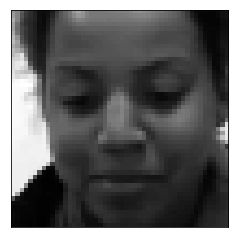

510


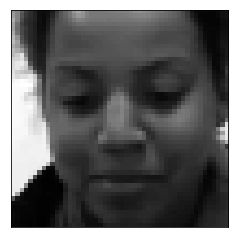

511


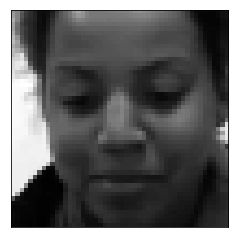

512


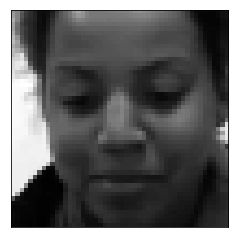

513


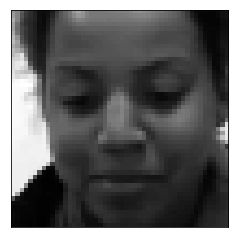

514


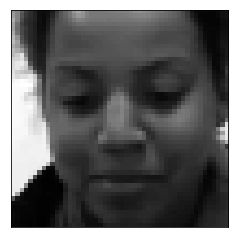

515


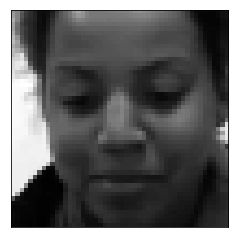

516


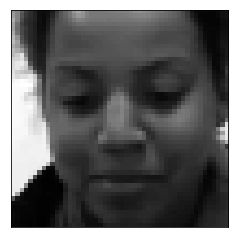

517


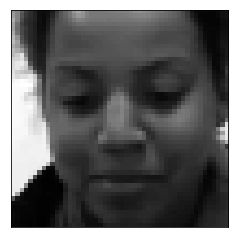

518


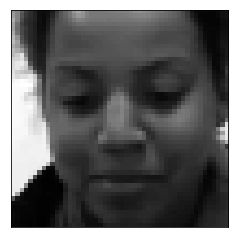

519


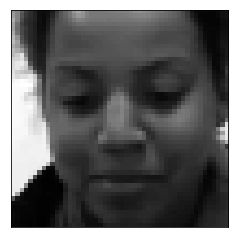

520


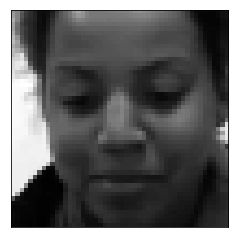

521


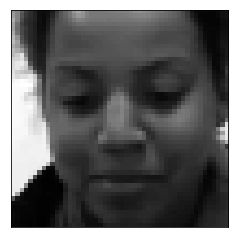

522


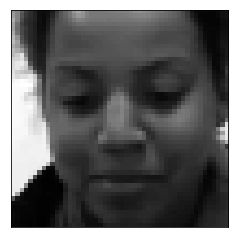

523


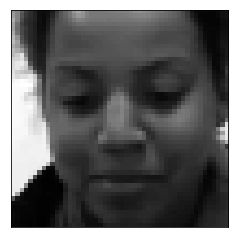

524


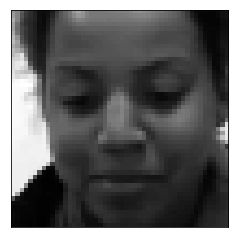

525


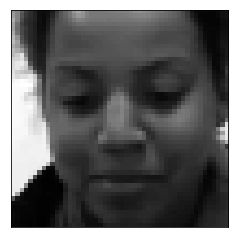

526


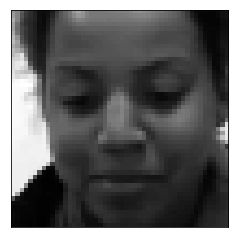

527


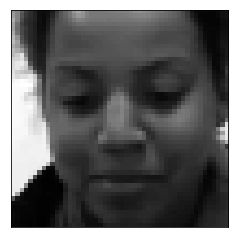

528


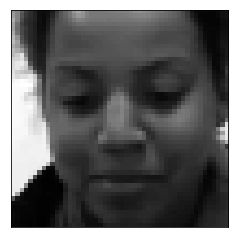

529


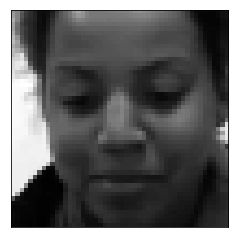

530


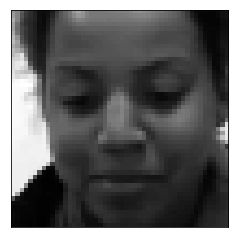

531


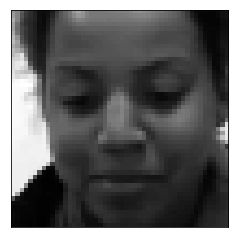

532


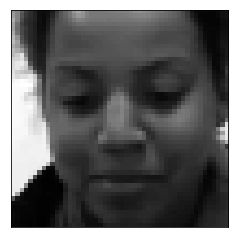

533


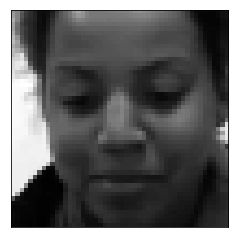

534


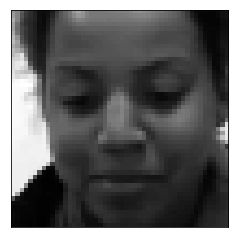

535


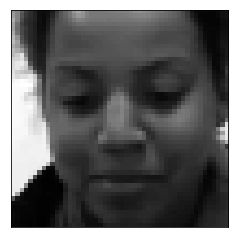

536


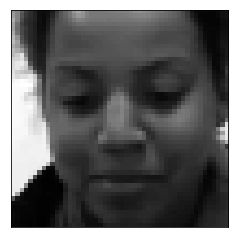

537


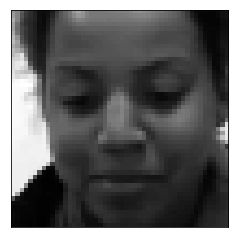

538


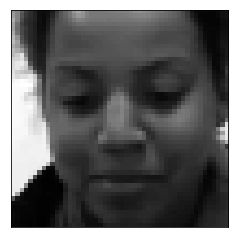

539


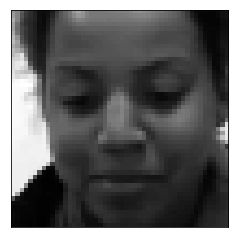

540


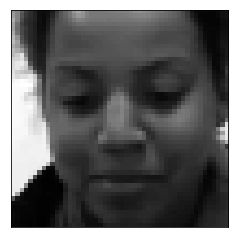

541


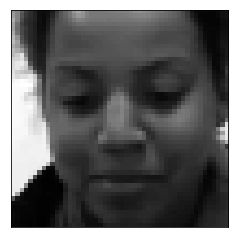

542


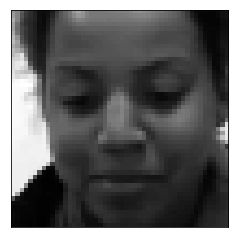

543


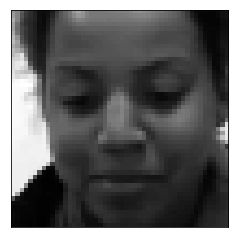

544


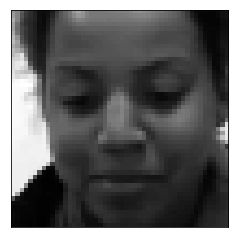

545


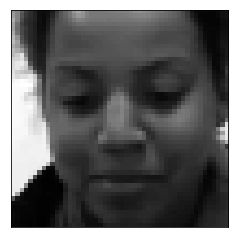

546


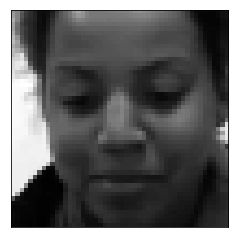

547


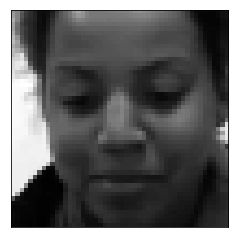

548


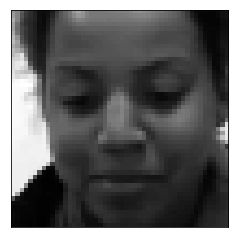

549


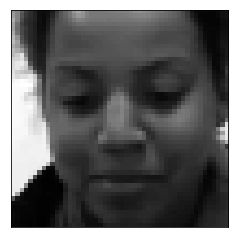

550


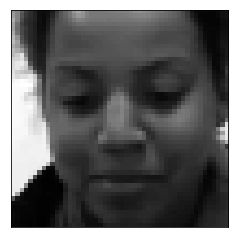

551


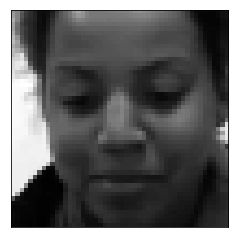

552


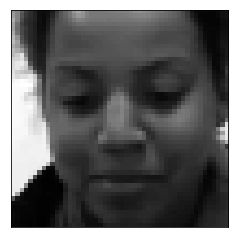

553


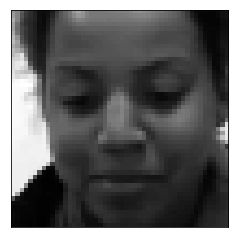

554


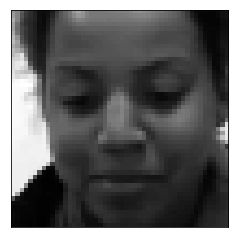

555


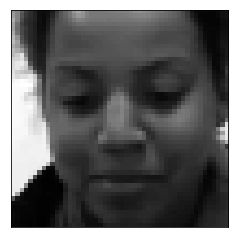

556


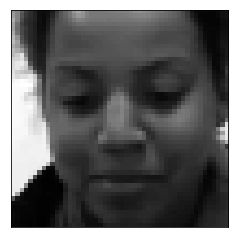

557


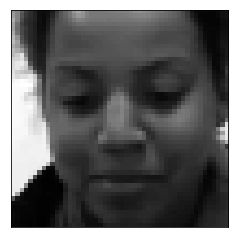

558


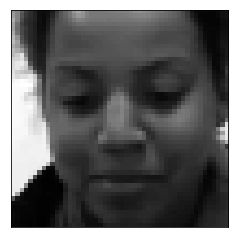

559


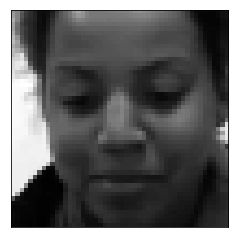

560


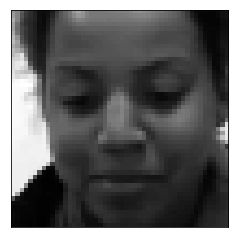

561


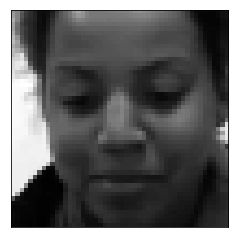

562


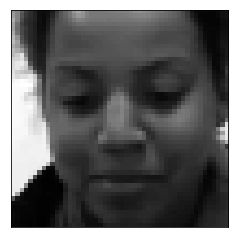

563


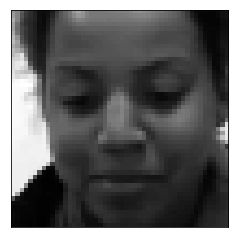

564


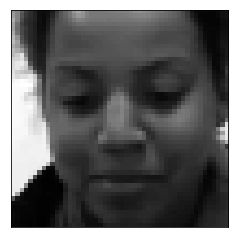

565


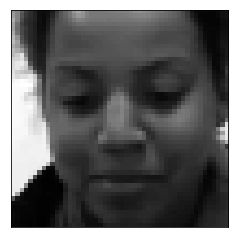

566


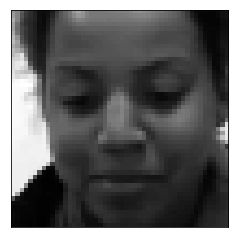

567


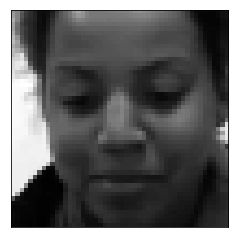

568


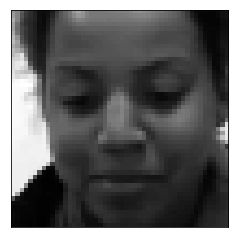

569


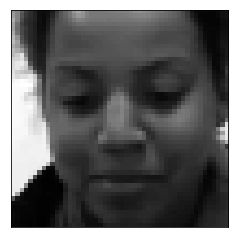

570


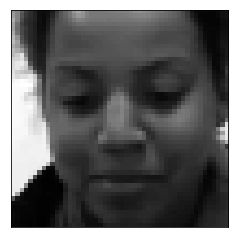

571


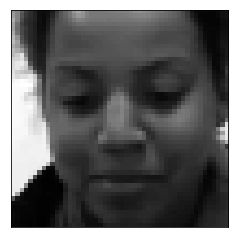

572


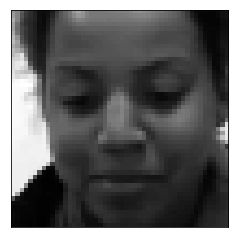

573


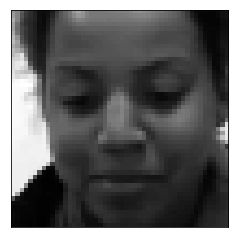

574


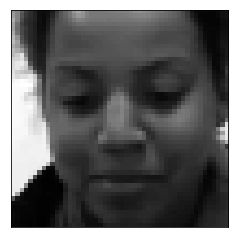

575


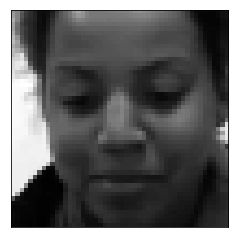

576


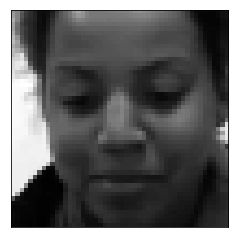

577


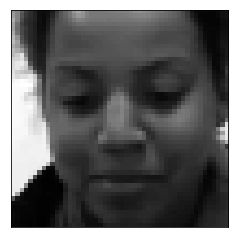

578


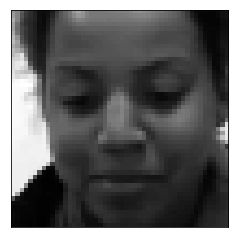

579


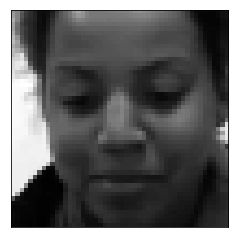

580


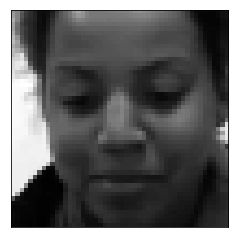

581


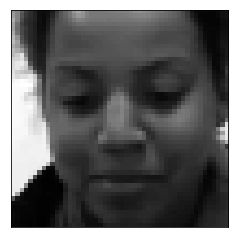

582


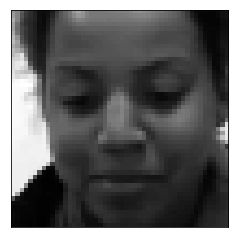

583


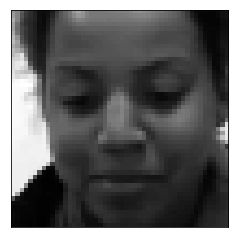

584


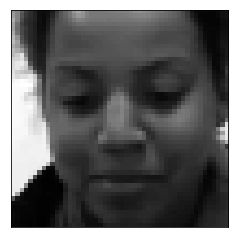

585


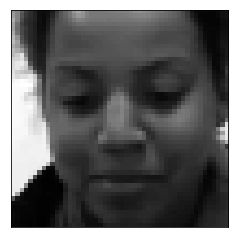

586


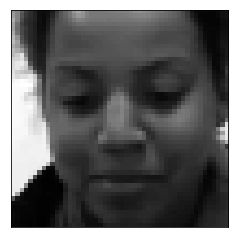

587


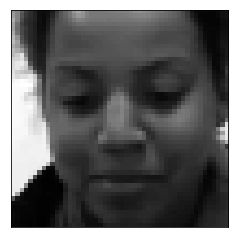

588


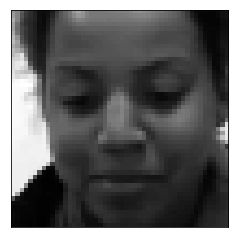

589


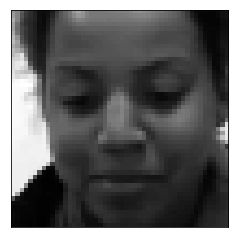

590


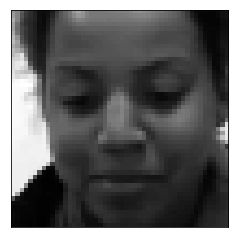

591


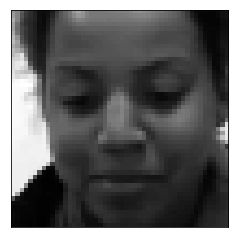

592


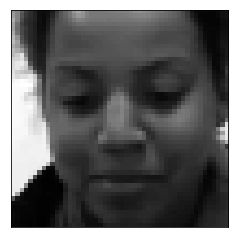

593


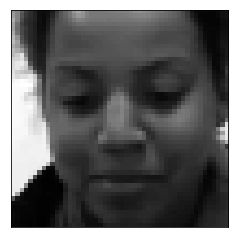

594


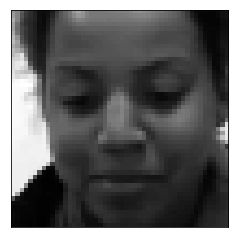

595


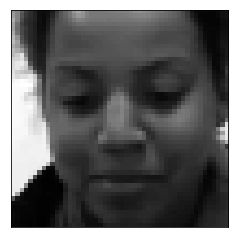

596


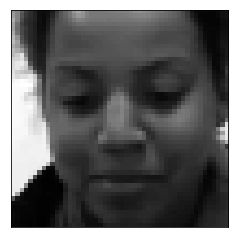

597


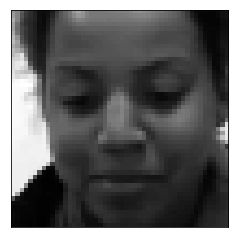

598


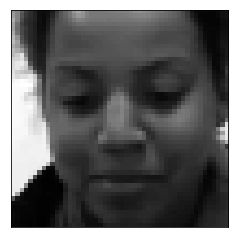

599


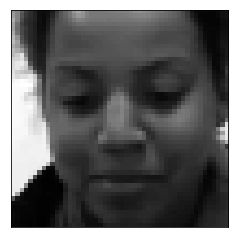

600


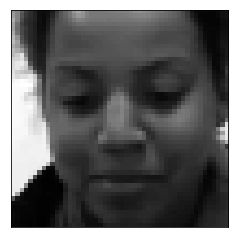

601


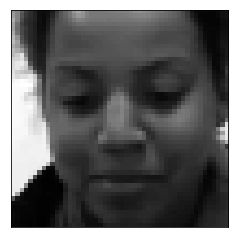

602


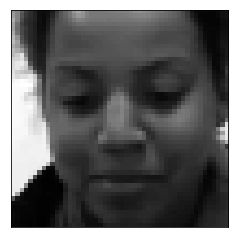

603


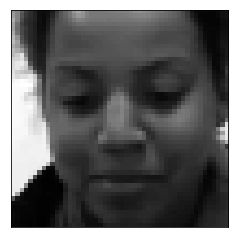

604


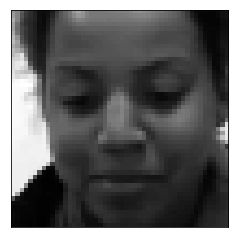

605


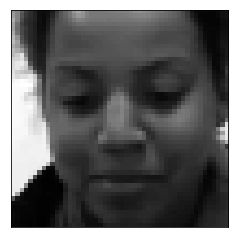

606


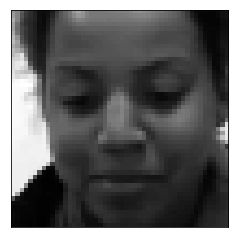

607


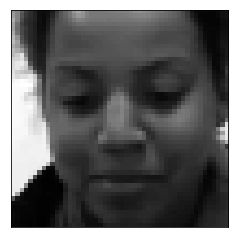

608


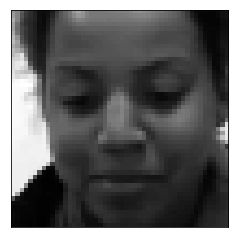

609


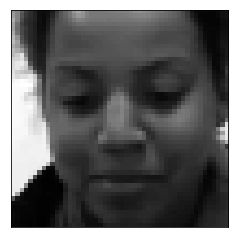

610


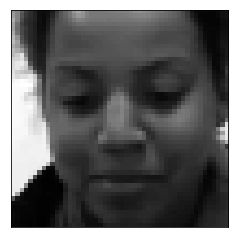

611


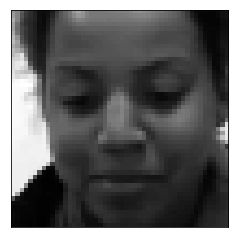

612


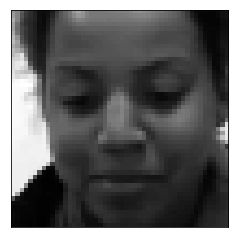

613


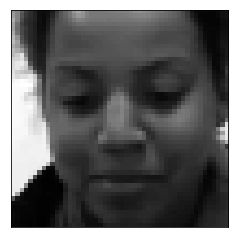

614


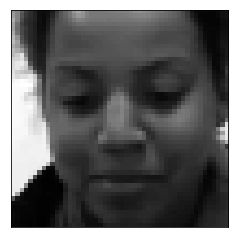

615


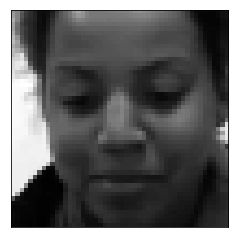

616


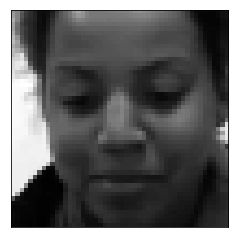

617


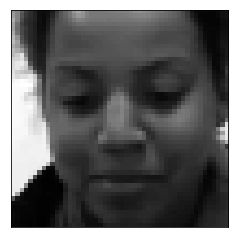

618


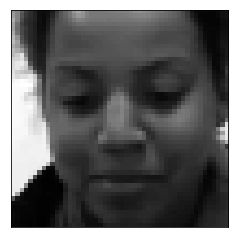

619


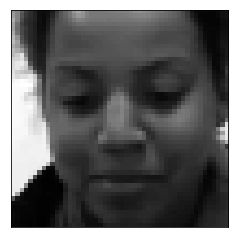

620


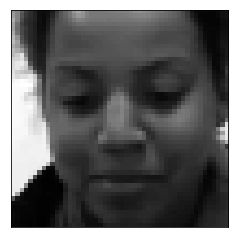

621


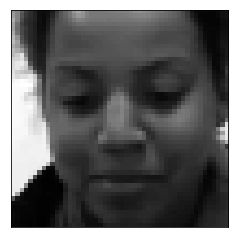

622


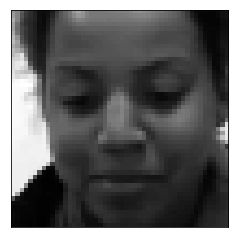

623


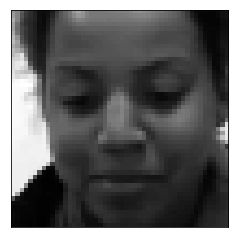

624


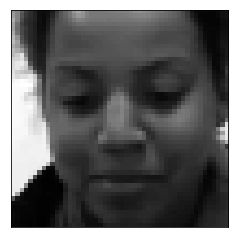

625


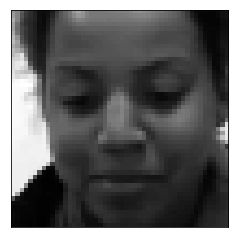

626


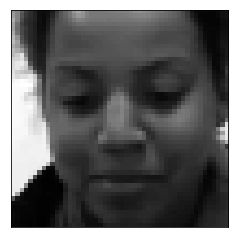

627


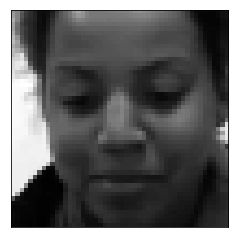

628


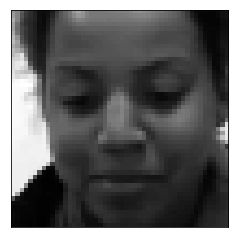

629


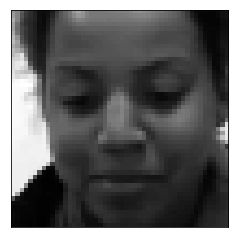

630


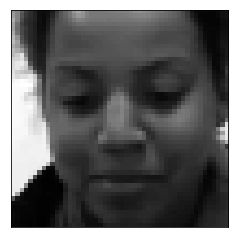

631


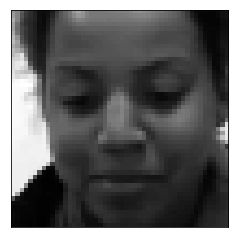

632


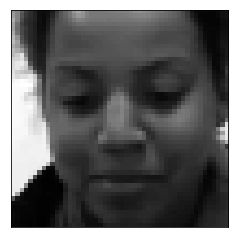

633


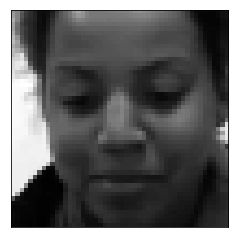

634


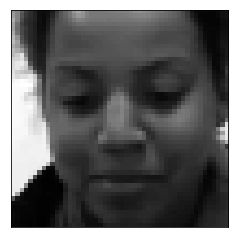

635


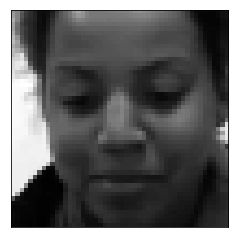

636


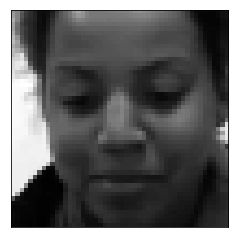

637


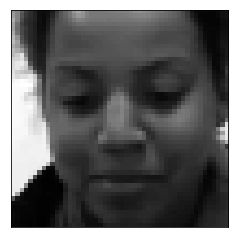

638


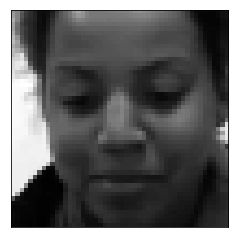

639


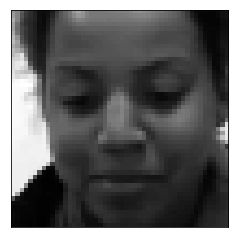

640


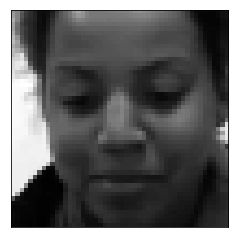

641


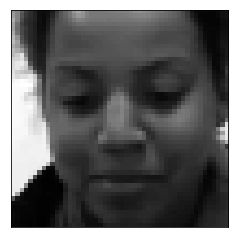

642


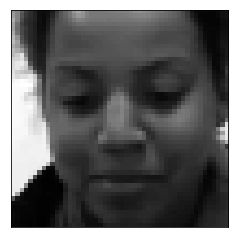

13

In [43]:
#impresion training
for x in range(len(tempo)):
    print(x)
    plt.imshow(tempo[y][0], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
len(videosDeceit)

0


TypeError: Invalid dimensions for image data

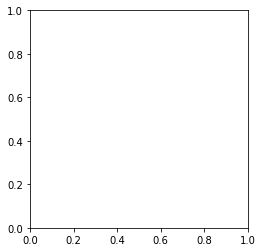

In [42]:
for x in range(len(tempo)):
    for y in range(len(tempo[x])):
        print(x)
        plt.imshow(tempo[x][y][0], interpolation='none', cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.show()
len(videosDeceit)

In [18]:
tempo =  np.load('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/TestY'+str(numberFrames)+'.npy')

In [19]:
tempo

array([list([[0, 1], [0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1]]), list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1]]),
       list([[0, 1], [0, 1], [0, 1], [0, 1]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 

In [19]:
yDeceitF

array([list([[1, 0], [1, 0]]), list([[1, 0], [1, 0]]),
       list([[1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]])], dtype=object)

In [29]:
yDeceitF = []
for x in range(len(tempo)):
    yDeceit = []
    for y in range(len(tempo[x])):
        yDeceit.append([1,0])
    #yDeceit = np.array(yDeceit)
    yDeceitF.append(yDeceit)
yDeceitF = np.array(yDeceitF)
print(yDeceitF)

[list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], [1, 0]])
 list([[1, 0], [1, 0], [1, 0]]) list([[1, 0], [1, 0], 

In [27]:
yDeceitF

array([list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]), list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0]]),
       list([[1, 0], [1, 0], [1, 0], [1, 0]]),
       list([[1, 

In [20]:
np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/ValidationDeceitY'+str(numberFrames)+'.npy',np.array(yDeceitF))